<h1 style='color:red'> Diabetes Patients - Data Analysis</h1>

<img src ='healthcare.jfif'>

**Problem Statement:**

Build a model to accurately predict whether the patients in the dataset have diabetes or not?

**Dataset Description:**

The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.


   * Pregnancies: Number of times pregnant
   * Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
   * BloodPressure: Diastolic blood pressure (mm Hg)
   * SkinThickness: Triceps skin fold thickness (mm)
   * Insulin: 2-Hour serum insulin (mu U/ml)
   * BMI: Body mass index (weight in kg/(height in m)^2)
   * DiabetesPedigreeFunction: Diabetes pedigree function
   * Age: Age (years)
   * Outcome: Class variable (0 or 1) 268 of 768 are 1, the others are 0

**Approach:**

Following pointers will be helpful to structure your findings.   

1.	Perform descriptive analysis. It is very important to understand the variables and corresponding values. We need to think through - Can minimum value of below listed columns be zero (0)? On these columns, a value of zero does not make sense and thus indicates missing value.
        •	Glucose
        •	BloodPressure
        •	SkinThickness
        •	Insulin
        •	BMI

      How will you treat these values?

2.	Visually explore these variable, you may need to look for the distribution of these variables using histograms. Treat the missing values accordingly.

3.	 We observe integer as well as float data-type of variables in this dataset. Create a count (frequency) plot describing the data types and the count of variables. 


4.	Check the balance of the data by plotting the count of outcomes by their value. Describe your findings and plan future course of actions.

5.	Create scatter charts between the pair of variables to understand the relationships. Describe your findings.

6.	Perform correlation analysis. Visually explore it using a heat map.

7.	Devise strategies for model building. It is important to decide the right validation framework. Express your thought process. Would Cross validation be useful in this scenario?

8.	Apply an appropriate classification algorithm to build a model. Compare various models with the results from KNN.

9.	Create a classification report by analysing sensitivity, specificity, AUC(ROC curve) etc. Please try to be as descriptive as possible to explain what values of these parameter you settled for? any why?

10.	Create a dashboard in tableau by choosing appropriate chart types and metrics useful for the business. The dashboard must entail the following: 
        * Pie chart to describe the diabetic/non-diabetic population
        * Scatter charts between relevant variables to analyse the relationships
        * Histogram/frequency charts to analyse the distribution of the data
        * Heatmap of correlation analysis among the relevant variables
        * Create bins of Age values – 20-25, 25-30, 30-35 etc. and analyse different variables for these age brackets using a bubble chart. 


# 1. Import necessary libraries for EDA 

In [281]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from IPython.display import display_html,Markdown,display,HTML
from termcolor import colored
from colored import stylize

from math import sqrt

import warnings
warnings.filterwarnings('ignore')

In [282]:
#define necessary functions
#1. for customized printing
def printmd(string, color = None):
    colorstr = "<span style='color:{}'>{}</span>".format(color,string)
    display(Markdown(colorstr))
    
#2. To plot distribution
def distplot (figRows, figCols, xSize, ySize, data, features, colors, kde=True, bins = None):
    f, axes = plt.subplots(figRows, figCols, figsize = (xSize, ySize))
    features = np.array(features).reshape(figRows, figCols)
    colors = np.array(colors).reshape(figRows, figCols)
    
    for row in range(figRows):
        for col in range(figCols):
            if (figRows == 1 and figCols == 1):
                axesplt = axes
            elif (figRows == 1 and figCols > 1):
                axesplt = axes[col]
            elif (figRows > 1 and figCols ==1):
                axesplt = axes[row]
            else:
                axesplt = axes[row][col]
            plot = sns.distplot(data[features[row][col]],
                               color = colors[row][col],
                               bins = bins, ax = axesplt,kde = kde,
                                hist_kws = {'edgecolor':'k'})
            plot.set_xlabel(features[row][col],fontsize = 20)


#3. display dataframe side by side
def display_side_by_side(args):
    html_str =''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style = "display:inline;margin-left:50px !important;margin-right: 40px !important"'),raw = True)
#display: inline - no line break before or after the element

In [283]:
df = pd.read_csv("health care diabetes.csv")

In [284]:
df_copy = df.copy()

In [285]:
df_copy.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

# 2. EDA 

In [286]:
features = df_copy.columns.drop(['Outcome'])
features

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

# 2.a] Shape of Data 

In [287]:
printmd("**Number of rows in the dataset are: "+str(df_copy.shape[0])+"**",color = 'brown')
printmd("**Number of features in the dataset are: "+str(df_copy.shape[1])+"**",color = 'brown')

<span style='color:brown'>**Number of rows in the dataset are: 768**</span>

<span style='color:brown'>**Number of features in the dataset are: 9**</span>

# 2.b] Data type of each attribute 

In [288]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# 2.c] Five point summary of the data 

In [289]:
df_copy.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

<h3 style='color:red'> Observations: </h3>
    
* There is a significant difference between mean and standard deviaition in case of features - 'Glucose','Insulin'
* So, there is a possibility of skewness in the data. We will check it in later point of time.

# 2.d] Check for missing values

In [290]:
#missing values
df_copy.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# 2.e] Unique values for each feature 

In [291]:
#unique values in new dataset
df_copy.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [292]:
for col in df_copy.columns:
    unique_values_df = (
        pd.DataFrame(df_copy[col].value_counts())
        .reset_index()
        .rename(columns={'index': col, col: 'count_temp'})  # Use a temporary column name
        .sort_values(by='count_temp', ascending=False)
        .rename(columns={'count_temp': 'count'})  # Rename it back to 'count' after sorting
    )
    print(f"\nUnique values in the '{col}' feature are:\n{unique_values_df}")



Unique values in the 'Pregnancies' feature are:
    count  count
16     17      1
15     15      1
14     14      2
12     13     10
13     12      9
11     11     11
10     10     24
9       9     28
8       8     38
7       7     45
6       6     50
5       5     57
4       4     68
3       3     75
2       2    103
0       1    135
1       0    111

Unique values in the 'Glucose' feature are:
     count  count
117    199      1
122    198      1
82     197      4
86     196      3
105    195      2
..     ...    ...
128     61      1
111     57      2
118     56      1
133     44      1
71       0      5

[136 rows x 2 columns]

Unique values in the 'BloodPressure' feature are:
    count  count
39    122      1
46    114      1
33    110      3
35    108      2
31    106      3
36    104      2
41    102      1
30    100      3
32     98      3
28     96      4
40     95      1
26     94      6
23     92      8
15     90     22
13     88     25
16     86     21
25     85      6
14 

<h3 style= 'color:red'> Observations: </h3>

* There are no null values  in the dataset . But some of the variables have zero values, which doesn't make any sense, in case of some features. e.g. bloodpressure. 
* Features with zero values are -> Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin and BMI.
* Except 'Pregnancies' feature, zero value for ather features doesn't make any sense and these are actually null values.
* We will explore these variables in more details

# 2.f]  Missing value imputation for-
* Glucose
* BloodPressure
* SkinThickness
* Insulin
* BMI

In [293]:
missing_val = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
missing_val

['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

In [294]:
for i in missing_val:
    print(round(df_copy[i].mean(),1))

120.9
69.1
20.5
79.8
32.0


In [295]:
for i in missing_val:
    df_copy[i] = df_copy[i].replace(0,round(df_copy[i].mean(),0))

In [296]:
# Check whether the missing values are replaced or not
for i in missing_val:
    print(df_copy[i].value_counts())

Glucose
100    17
99     17
111    14
125    14
106    14
       ..
191     1
177     1
44      1
62      1
190     1
Name: count, Length: 135, dtype: int64
BloodPressure
70     57
74     52
78     45
68     45
72     44
64     43
80     40
76     39
60     37
69     35
62     34
66     30
82     30
88     25
84     23
90     22
86     21
58     21
50     13
56     12
52     11
54     11
75      8
92      8
65      7
85      6
94      6
48      5
96      4
44      4
100     3
106     3
98      3
110     3
55      2
108     2
104     2
46      2
30      2
122     1
95      1
102     1
61      1
24      1
38      1
40      1
114     1
Name: count, dtype: int64
SkinThickness
21    237
32     31
30     27
27     23
23     22
28     20
18     20
33     20
31     19
39     18
19     18
29     17
25     16
26     16
37     16
40     16
22     16
35     15
41     15
17     14
36     14
15     14
20     13
24     12
13     11
42     11
34      8
46      8
38      7
12      7
16      6
11      6

# 2.g] Skewness:

In [297]:
df_copy.skew()

Pregnancies                 0.901674
Glucose                     0.533158
BloodPressure               0.174105
SkinThickness               1.232538
Insulin                     3.293547
BMI                         0.601059
DiabetesPedigreeFunction    1.919911
Age                         1.129597
Outcome                     0.635017
dtype: float64

<h3 style= 'color:red'> Observations: </h3>

* The data is definitely skewed but by very small amount. 
* It should not affect the model, Except for **Insulin and DiabetesPedigreeFunction.**
* We have removed  all the zero values and there are no negative values as well. So, will use **log transformation** to reduce the skewness.

In [298]:
df_copy['Insulin'] = np.log(df_copy['Insulin'])
df_copy['DiabetesPedigreeFunction'] = np.log(df_copy['DiabetesPedigreeFunction'])

In [299]:
df_copy.skew()

Pregnancies                 0.901674
Glucose                     0.533158
BloodPressure               0.174105
SkinThickness               1.232538
Insulin                     0.844061
BMI                         0.601059
DiabetesPedigreeFunction    0.114178
Age                         1.129597
Outcome                     0.635017
dtype: float64

**The skewness in Insulin and DiabetesPedegreeFunction is successully reduced using log transformation**

# 3. Data Analysis and visualization 

In [300]:
features

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [301]:
df_copy.groupby('Insulin')['Outcome'].count()

Insulin
2.639057    1
2.708050    1
2.772589    1
2.890372    2
3.091042    1
           ..
6.361302    1
6.396930    1
6.522093    1
6.612041    1
6.740519    1
Name: Outcome, Length: 186, dtype: int64

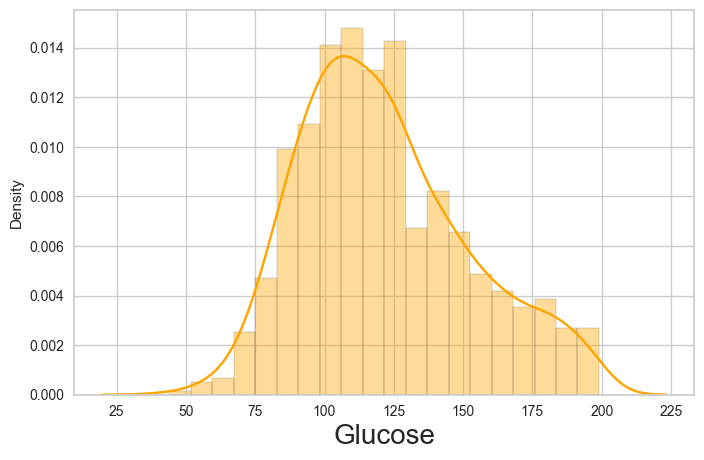

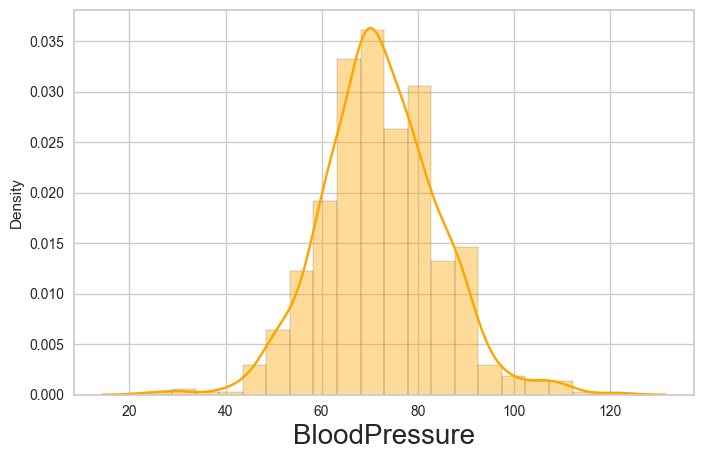

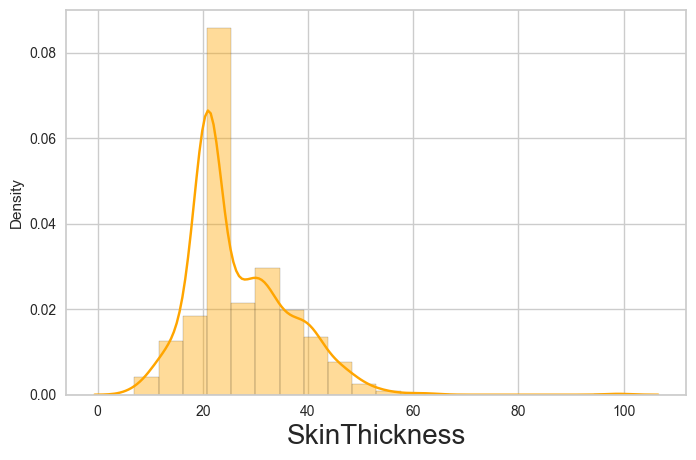

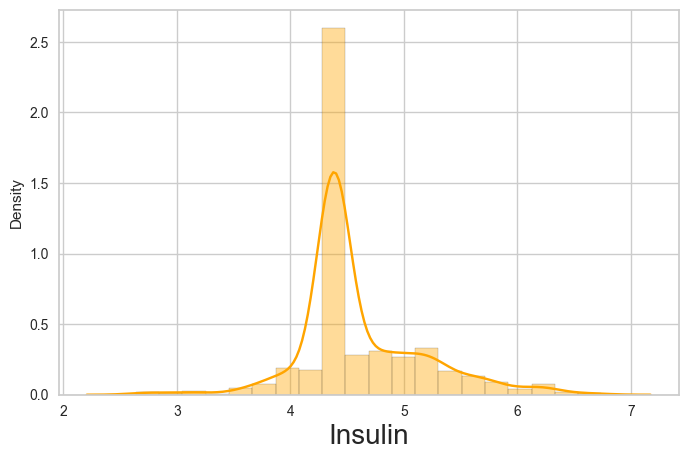

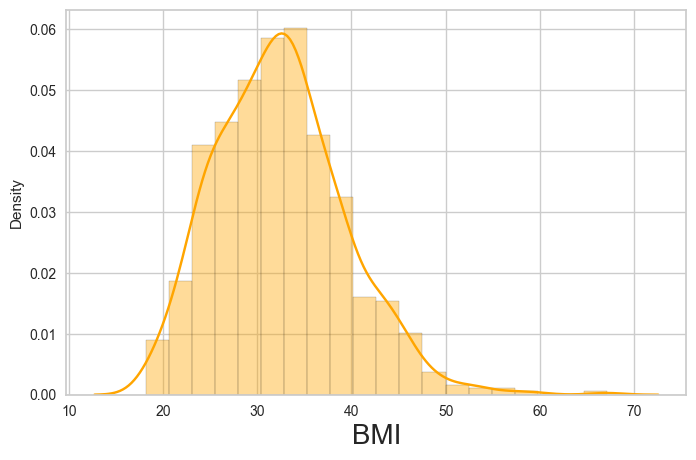

In [302]:
# Check the distribution of variables for which we performed zero value imputation and log transformation
for i in missing_val:
    distplot(1,1,8,5, data = df_copy, features = i,kde = True,
         colors = 'orange',bins =20)

<h3 style= 'color:red'> Observations: </h3>

* As expected, there are no zero values in the data.
* We have also reduced the skewness

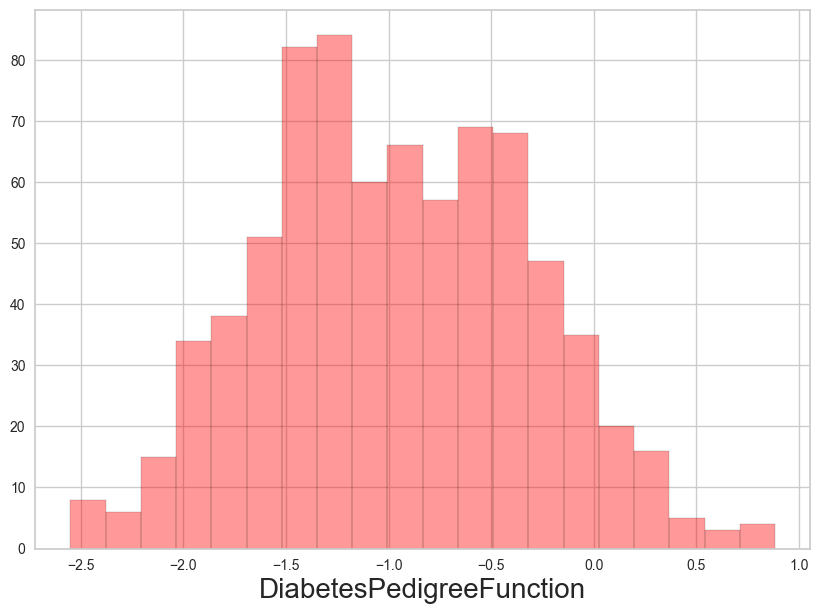

In [303]:
distplot(1,1,10,7, data = df_copy, features = 'DiabetesPedigreeFunction',kde = False,
         colors = 'red',bins =20)

# 3.a] Check balance of the data

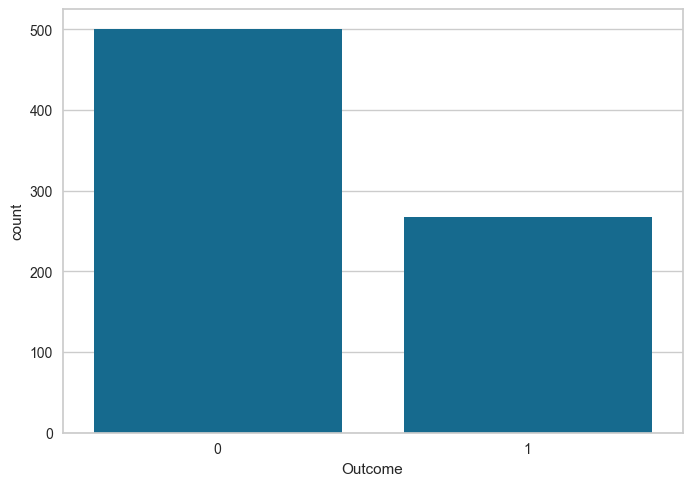

In [304]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_copy is your DataFrame and it has the 'Outcome' column
sns.countplot(x='Outcome', data=df_copy)
plt.show()


<h3 style= 'color:red'> Observations: </h3>

* The difference between the count of non-diabetic and diabetic patients is not negligible.
* Thus, our data is imbalanced.
* This helps in determining the evaluation metric for the model. 
* Since we have imbalanced data, we will use precision, recall and AUC score for evaluating performance of the models

In [305]:
features

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

# Bivariate Analysis 

## 1. Outcome vs Preganancies 

In [306]:
# Pregnanices is a categorical feature. Its effect on the outcome can be analysed with crosstab
preg_vs_outcome = pd.crosstab(df_copy['Outcome'],df_copy['Pregnancies'],normalize ='columns')
preg_vs_outcome.T

Outcome             0         1
Pregnancies                    
0            0.657658  0.342342
1            0.785185  0.214815
2            0.815534  0.184466
3            0.640000  0.360000
4            0.661765  0.338235
5            0.631579  0.368421
6            0.680000  0.320000
7            0.444444  0.555556
8            0.421053  0.578947
9            0.357143  0.642857
10           0.583333  0.416667
11           0.363636  0.636364
12           0.555556  0.444444
13           0.500000  0.500000
14           0.000000  1.000000
15           0.000000  1.000000
17           0.000000  1.000000

<h3 style= 'color:red'> Observations: </h3>

* The outcome is affected by so many featrures. 
* In case of pregnancies, there is no clear boundary specifying the effect of pregnancies on outcome. 
* Till 6th pregnancy, the chances of diagnosing diabetes are lesser(less than 40%). 

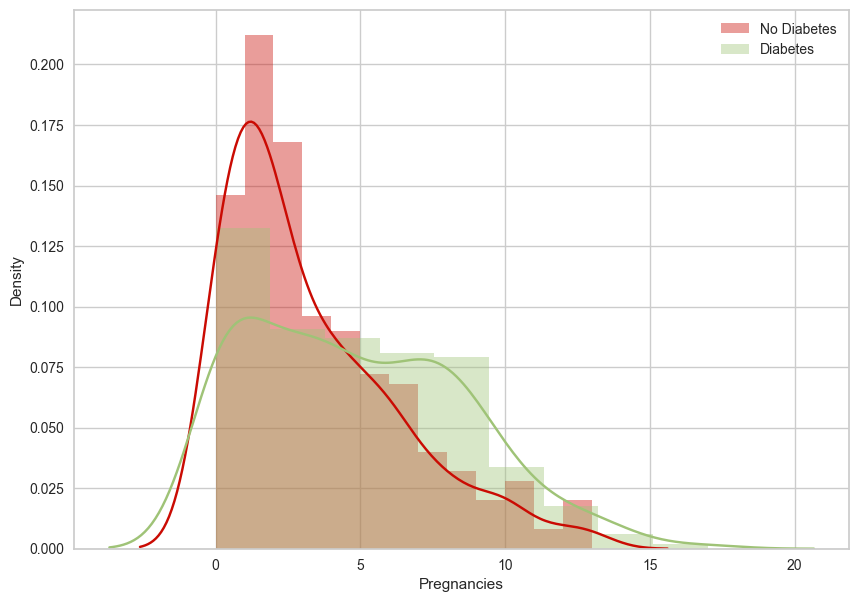

In [307]:
plt.figure(figsize = (10,7))
sns.distplot(df_copy[df_copy['Outcome']==0]['Pregnancies'],color ='r',label = 'No Diabetes')
sns.distplot(df_copy[df_copy['Outcome']==1]['Pregnancies'],color ='g',label = 'Diabetes')
plt.legend()
plt.show()

<h3 style= 'color:red'> Observations: </h3>

* Till 5th pregnancy, patient is less likely to get diagnosed with diabetes.
* After that the chances of getting diabetes are very high.

## 2. Outcome vs Age

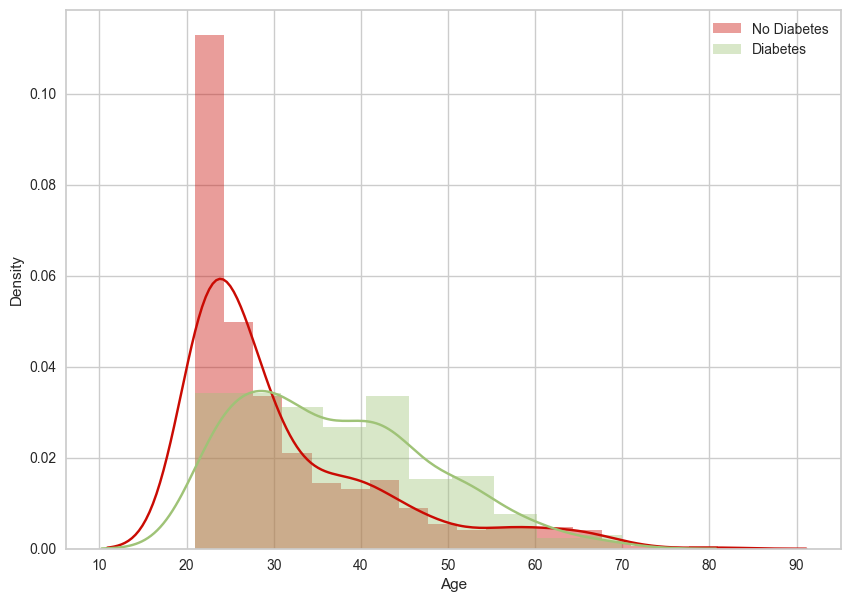

In [308]:
plt.figure(figsize = (10,7))
sns.distplot(df_copy[df_copy['Outcome']==0]['Age'],color ='r',label = 'No Diabetes')
sns.distplot(df_copy[df_copy['Outcome']==1]['Age'],color ='g',label = 'Diabetes')
plt.legend()
plt.show()

In [309]:
df_copy['Age'].describe()

count    768.000000
mean      33.240885
std       11.760232
min       21.000000
25%       24.000000
50%       29.000000
75%       41.000000
max       81.000000
Name: Age, dtype: float64

<h3 style= 'color:red'> Observations: </h3>

* The age range recorded is from 21 to 81.
* Patients in the age range 21-31 are less likely to get diabetes comapred to 30+ aged prople. 
* We can broadly make 4 age groups for further analysis.

In [310]:
'''
Convert age into 4 categories -> 
21 - 30 => Young
30 - 45 => Adults
45 - 65 => Mid-Aged
65 - 81 => Old
''' 
# make a copy of dataset for exploratory analysis purpose
df1 = df_copy.copy()
for i in range(0,len(df1['Age'])):
    if df1['Age'][i] <= 30:
        df1['Age'][i] = 'Young'
    elif 30 < df1['Age'][i] <= 45:
        df1['Age'][i] = 'Adult'
    elif 45 < df1['Age'][i] <= 65:
        df1['Age'][i] = 'Mid-Aged'
    else:
        df1['Age'][i] = 'Old'
df1['Age'].value_counts()

Age
Young       417
Adult       233
Mid-Aged    105
Old          13
Name: count, dtype: int64

In [311]:
outcome_vs_age = pd.crosstab(df1['Outcome'],df1['Age'],normalize = 'columns').T.reset_index()
outcome_vs_age.rename(columns = {0:'No Diabetes',1:'Diabetes'},inplace = True)
outcome_vs_age

Outcome       Age  No Diabetes  Diabetes
0           Adult     0.484979  0.515021
1        Mid-Aged     0.485714  0.514286
2             Old     0.692308  0.307692
3           Young     0.784173  0.215827

<h3 style= 'color:red'> Observations: </h3>

* As per the dataset that we have, 22% of the Young people detecetd with diabetes. 
* In case of old people, there is a 31% chance that the patient will get diabetes. This is quite absurd but the Outcome of People in this age group also depends upon other factors as well.
* Adult and Mid-Aged people had almost 50-50 chance of getting diabetes

## 3. Outcome vs Glucose level
* If you have diabetes, your pancreas either produces too little insulin or none at all. The insulin can't be used effectively. This allows blood glucose levels to rise while the rest of your cells are deprived of much-needed energy.
* So, Glucose and insulin level will help categories diabetic and non-diabetic patiencts significantly

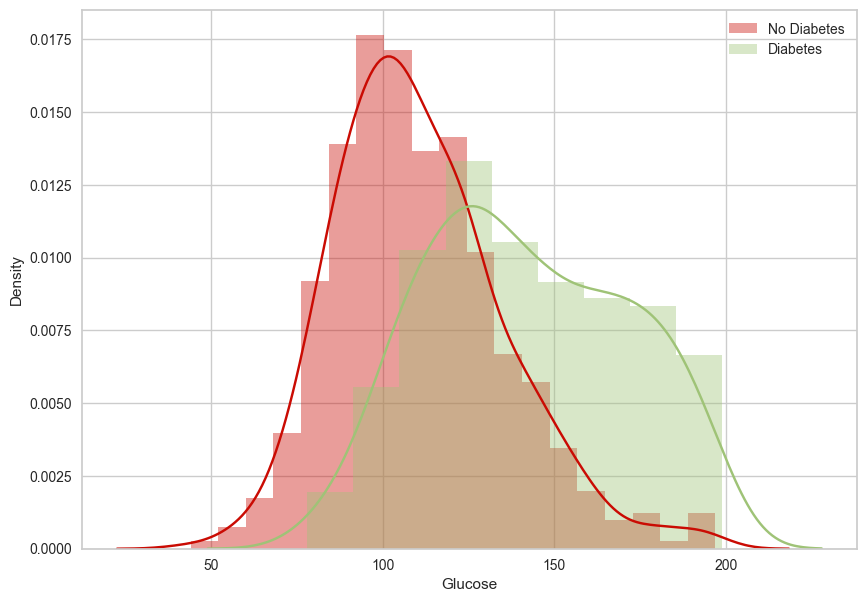

In [312]:
plt.figure(figsize = (10,7))
sns.distplot(df_copy[df_copy['Outcome']==0]['Glucose'],color ='r',label = 'No Diabetes')
sns.distplot(df_copy[df_copy['Outcome']==1]['Glucose'],color ='g',label = 'Diabetes')
plt.legend()
plt.show()

<h3 style= 'color:red'> Observations: </h3>

* As per the available data, patients with Plasma glucose concentration in an oral glucose tolerance test approx. less than 140 are less likely to have diabetes
* Some exceptions are still there in the range 100 - 140  where people were diagnosed with diabetes.

##  4. Outcome Vs BMI

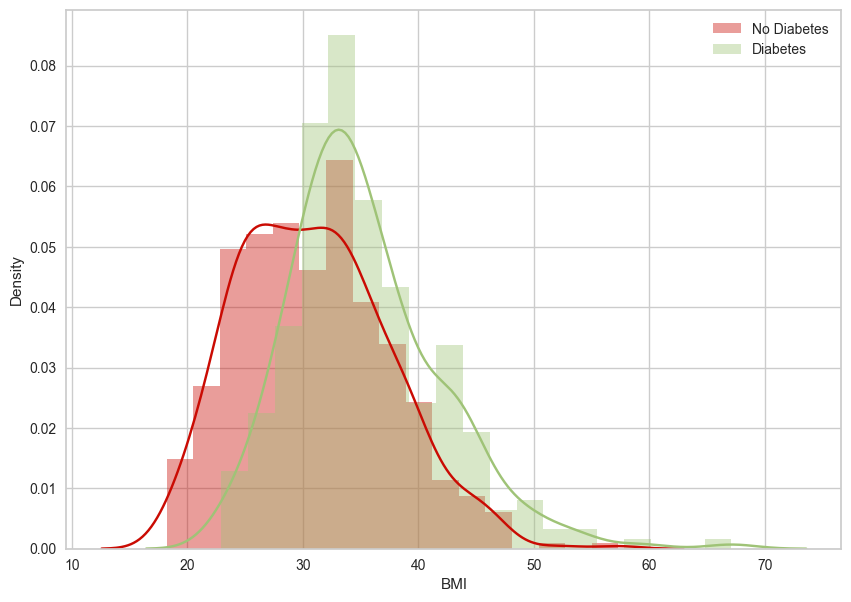

In [313]:
plt.figure(figsize = (10,7))
sns.distplot(df_copy[df_copy['Outcome']==0]['BMI'],color ='r',label = 'No Diabetes')
sns.distplot(df_copy[df_copy['Outcome']==1]['BMI'],color ='g',label = 'Diabetes')
plt.legend()

<h2 style ='color:red'> The BMI chart suggested by WHO: </h2>
<img src = 'bmi__WHO.jpg'>

<h3 style= 'color:red'> Observations: </h3>

* As per the normal BMI range set by WHO, and the data in hand, most of the patients who diagnosed with diabetes were either overweight or obese 
* People with normal range of BMI have lesser chance of getting diabetes

In [314]:
#We can create a new variable from BMI 

df2 = df_copy.copy()
df2['BMI_cat'] = df2['BMI']
for i in range(0,len(df2['BMI'])):
    if df2['BMI'][i] < 18.5:
        df2['BMI_cat'][i] = 'Underweight'
    
    elif 18.5 <= df2['BMI'][i] <= 24.9:
        df2['BMI_cat'][i] = 'Normal'
    
    elif 25.0 <= df2['BMI'][i] <= 29.9:
        df2['BMI_cat'][i] = 'Overweight'
    
    elif df2['BMI'][i] >= 30:
        df2['BMI_cat'][i] = 'Obese'
        
df2['BMI_cat'].value_counts()

BMI_cat
Obese          483
Overweight     179
Normal         102
Underweight      4
Name: count, dtype: int64

In [315]:
outcome_vs_bmi = pd.crosstab(df2['Outcome'],df2['BMI_cat'],normalize = 'columns').T.reset_index()
outcome_vs_bmi.rename(columns = {0:'No Diabetes',1:'Diabetes'},inplace = True)
outcome_vs_bmi

Outcome      BMI_cat  No Diabetes  Diabetes
0             Normal     0.931373  0.068627
1              Obese     0.542443  0.457557
2         Overweight     0.776536  0.223464
3        Underweight     1.000000  0.000000

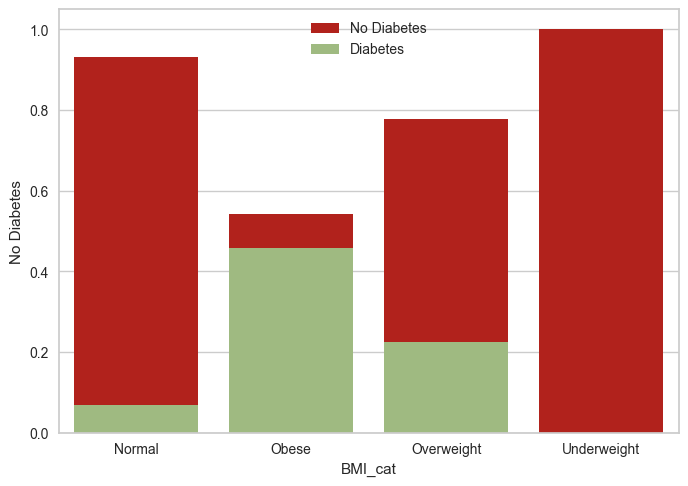

In [316]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming outcome_vs_bmi is your DataFrame
sns.barplot(x='BMI_cat', y='No Diabetes', data=outcome_vs_bmi, color='r', label='No Diabetes')
sns.barplot(x='BMI_cat', y='Diabetes', data=outcome_vs_bmi, color='g', label='Diabetes')
plt.legend()
plt.show()


<h3 style= 'color:red'> Observations: </h3>

* Out of 768 records, none of the underweight patient was diagnosed with a diabetes.
* 7% of the patients with normal BMI, diagnosed with diabetes.
* 22% of the overweight, diagnosed with diabetes.
* As expected, Obase patients has maximum percentage of 46% of having diabetes.

## 5. Outcome Vs BloodPressure 

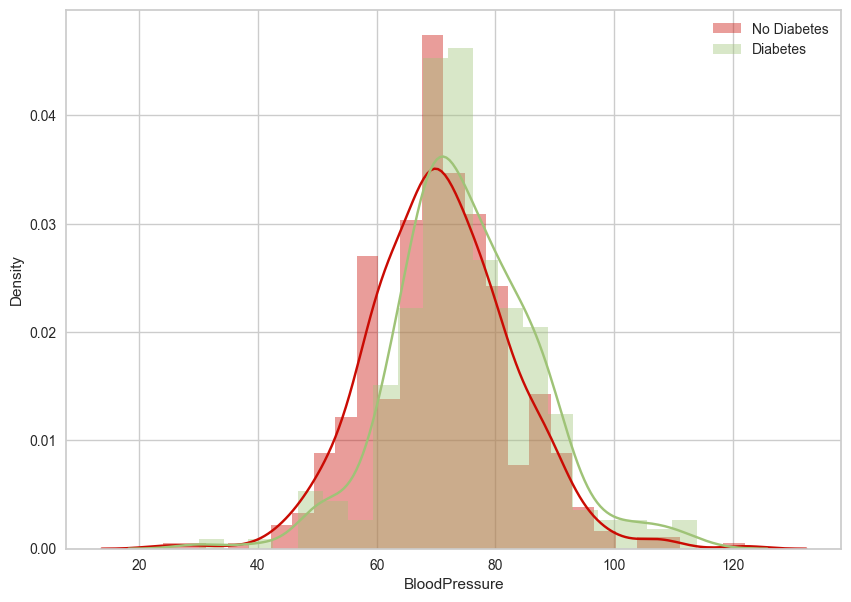

In [317]:
plt.figure(figsize = (10,7))
sns.distplot(df_copy[df_copy['Outcome']==0]['BloodPressure'],color ='r',label = 'No Diabetes')
sns.distplot(df_copy[df_copy['Outcome']==1]['BloodPressure'],color ='g',label = 'Diabetes')
plt.legend()

<h3 style= 'color:red'> Observations: </h3>

* It looks like blood pressure is not directly related in classifying whether the patient will get diabetes.

## 6. Outcome Vs SkinThickness 

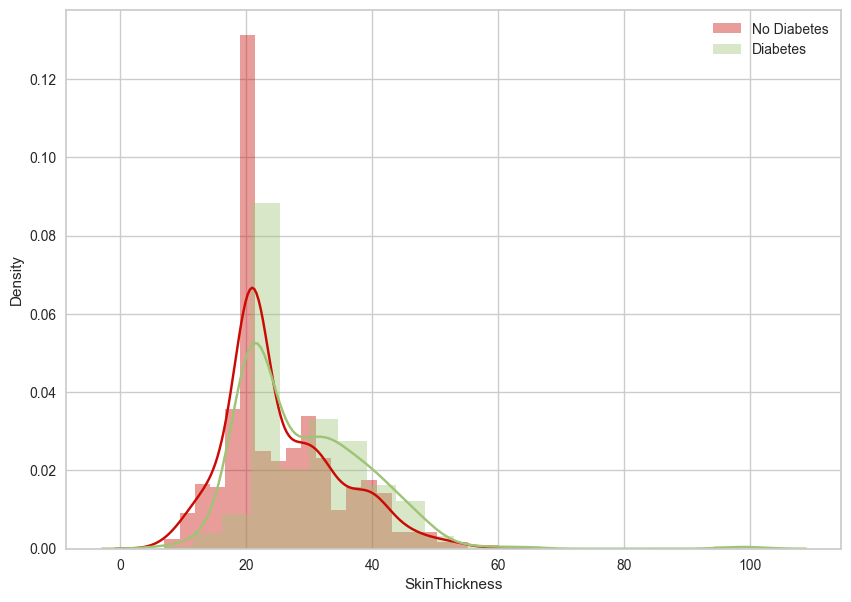

In [318]:
plt.figure(figsize = (10,7))
sns.distplot(df_copy[df_copy['Outcome']==0]['SkinThickness'],color ='r',label = 'No Diabetes')
sns.distplot(df_copy[df_copy['Outcome']==1]['SkinThickness'],color ='g',label = 'Diabetes')
plt.legend()

<h3 style= 'color:red'> Observations: </h3>

* From the above graph, it seems there is no direct relationship between skin thickness and diabetes

## 7. Outcome vs Insulin 

* Two hour serum insulin test measures the amount of insulin in your blood.


* This 2 hour Glucose Tolerance Test with Insulin levels is **used to assess how an individual processes glucose and how the insulin in the body responds to those glucose levels.** 

* This test is typically ordered when an individual may be at risk for diabetes or has had elevated glucose levels previously.

**What do the results mean?**

If your insulin levels were too high, it may mean you have:

* Type 2 diabetes
* Insulin resistance
* Hypoglycemia
* Cushing's syndrome, a disorder of the adrenal glands. Adrenal glands make hormones that help the body break down fat and protein.
* An insulinoma (pancreatic tumor)

If insulin levels were too low, it may mean you have:

* Hyperglycemia (high blood sugar)
* Type 1 diabetes
* Pancreatitis, an inflammation of the pancreas

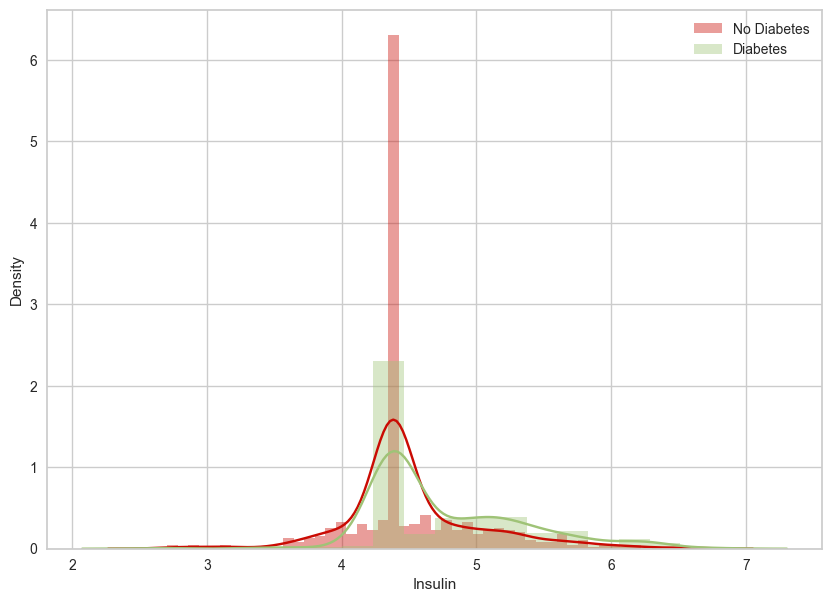

In [319]:
plt.figure(figsize = (10,7))
sns.distplot(df_copy[df_copy['Outcome']==0]['Insulin'],color ='r',label = 'No Diabetes')
sns.distplot(df_copy[df_copy['Outcome']==1]['Insulin'],color ='g',label = 'Diabetes')
plt.legend()

* The unit for the Insulin variable is not given. Thus, its quite difficult to decide whether the insulin in within the normal rane or out of range

* But insulin is directly related to the presence or absence of diabetes. So, we will make sure that this variable is ther in our prediction model

*Normal range of 2 hours after glucose administration is*	**16-166 mIU/L** 

In [320]:
df_copy['Insulin'].describe()

count    768.000000
mean       4.600579
std        0.543765
min        2.639057
25%        4.382027
50%        4.382027
75%        4.846148
max        6.740519
Name: Insulin, dtype: float64

##  8. Outcome vs DiabetesPedigreeFunction 

*Diabetes pedigree function (a function which scores likelihood of diabetes based on family history)* 

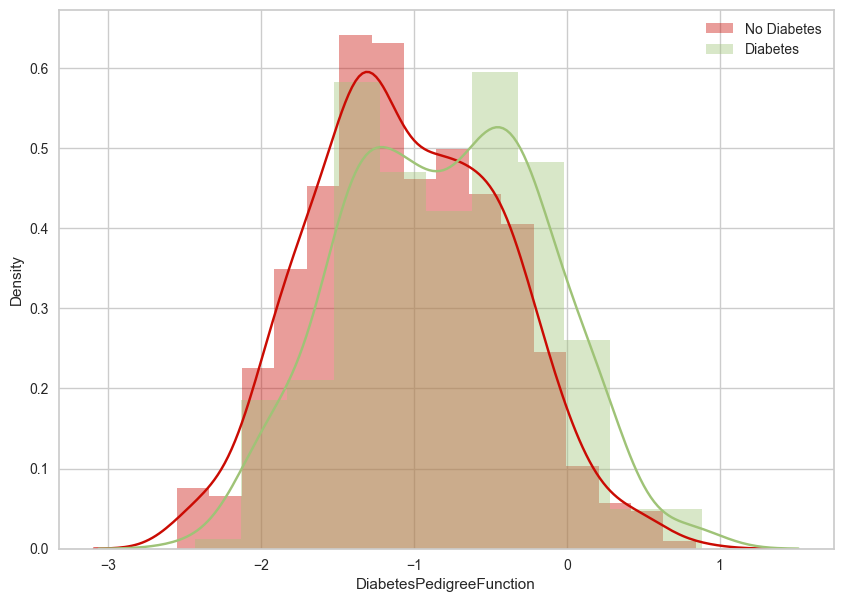

In [321]:
plt.figure(figsize = (10,7))
sns.distplot(df_copy[df_copy['Outcome']==0]['DiabetesPedigreeFunction'],color ='r',label = 'No Diabetes')
sns.distplot(df_copy[df_copy['Outcome']==1]['DiabetesPedigreeFunction'],color ='g',label = 'Diabetes')
plt.legend()

DiabetesPedigreeFunction: Diabetes pedigree function (a function which scores likelihood of diabetes based on family history) 


<h3 style= 'color:red'> Observations: </h3>

* If the function value is higher than -1 then the patient is more likely to get diabetes
* If the function value is less than -1 then there are less chances of getting diabetes

# Relationship between features 

## 1. Correlation Analysis: 

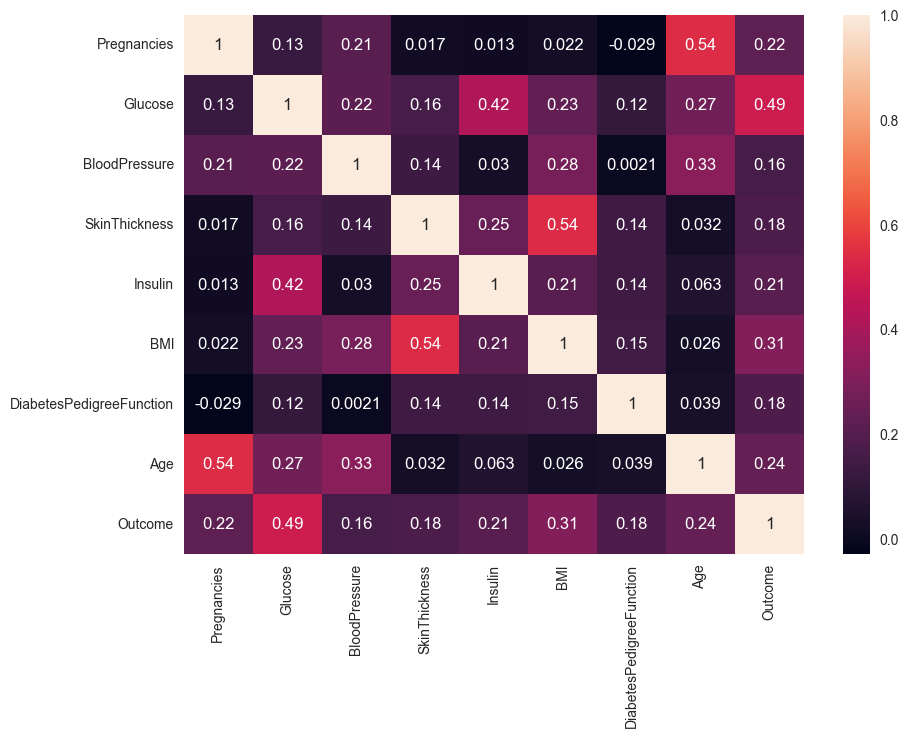

In [322]:
corr = df_copy.corr()
plt.figure(figsize=(10,7))
sns.heatmap(corr,annot = True)
plt.savefig('correlation_matrix.jpg')

<h3 style= 'color:red'> Observations: </h3>

* Age and pregnanies have moderate correlation, which is quite obvious
* BMI and skinthickness also has moderate correlation
* Insulin and Glucose also has moderate correlation, which is also obvious, as discussed before

## 2. To find the relation between the features, we will plot pairplot :

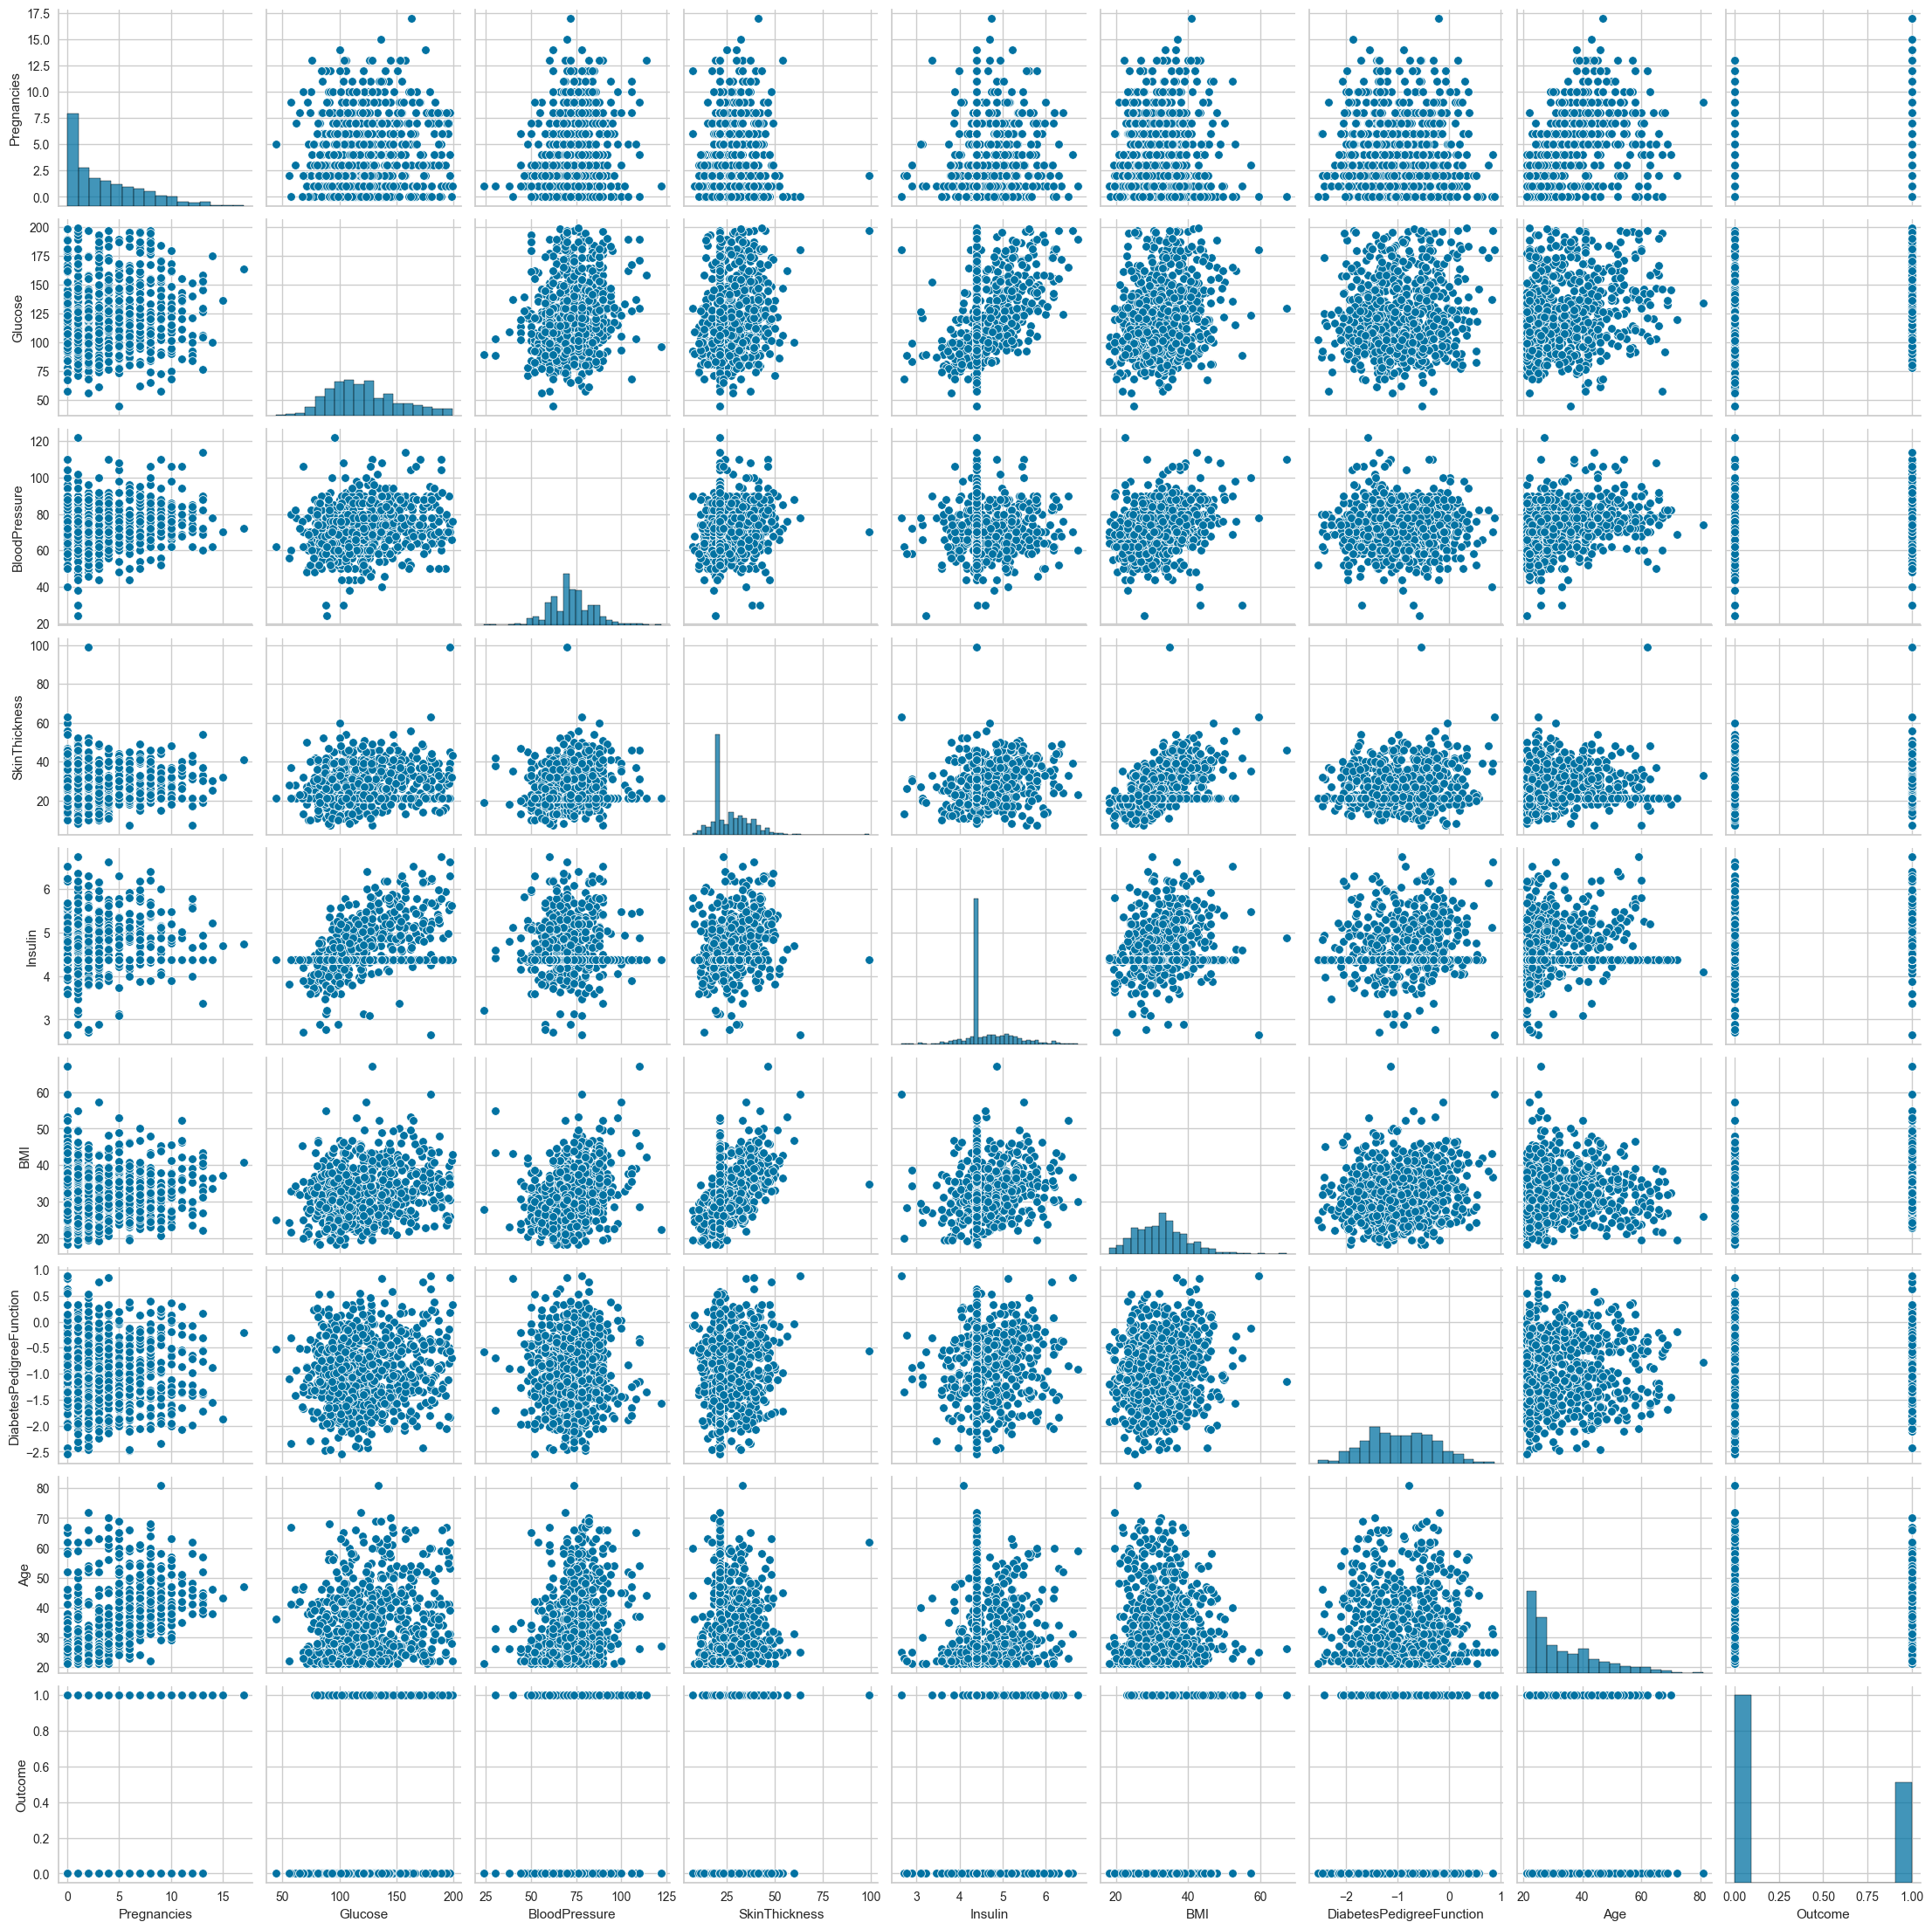

In [323]:
sns.pairplot(df_copy)

## 3. Glucose Vs. Insulin

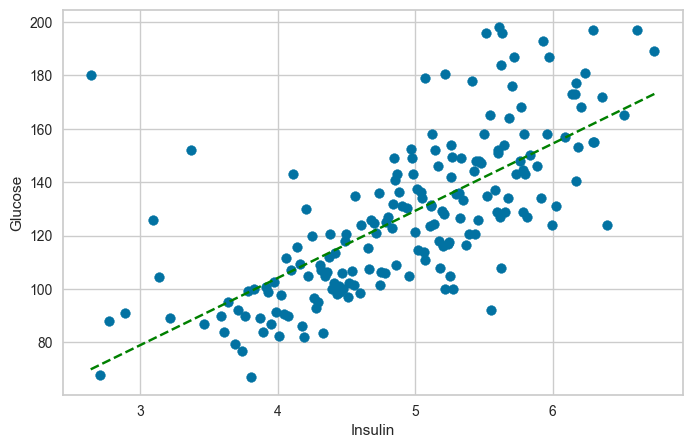

In [324]:
#We have ceted a new variable based on different bmi values 
data = pd.DataFrame(df_copy['Glucose'].groupby(df_copy['Insulin']).mean()).reset_index()
x = data['Insulin']
y = data['Glucose']
plt.figure(figsize=(8,5))
plt.scatter(x, y)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--",color ='green')
plt.xlabel('Insulin')
plt.ylabel('Glucose')

plt.show()

<h3 style= 'color:red'> Observations: </h3>

* We see somewhat linear relationship between Glucose and Insulin
* Glucose level increase with increase in Insulin

## 4. BMI Vs. SkinThickness

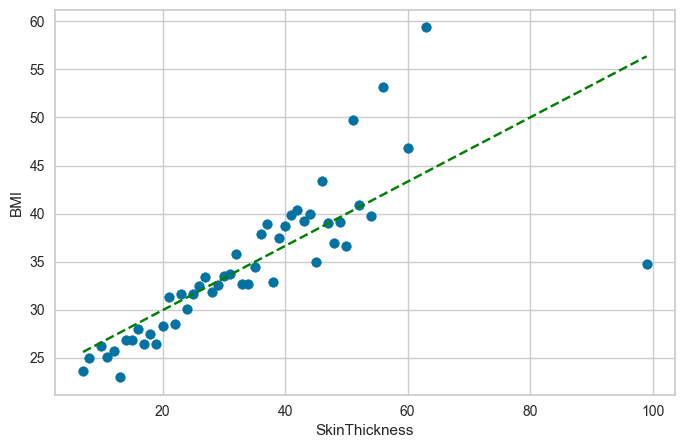

In [325]:
#We have ceted a new variable based on different bmi values 
data = pd.DataFrame(df_copy['BMI'].groupby(df_copy['SkinThickness']).mean()).reset_index()
x = data['SkinThickness']
y = data['BMI']
plt.figure(figsize=(8,5))
plt.scatter(x, y)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--",color ='green')
plt.xlabel('SkinThickness')
plt.ylabel('BMI')

plt.show()

<h3 style= 'color:red'> Observations: </h3>

* For skinthickness and BMI, there is also a linear relationship
* BMI increases with increase in SkinThickness

## 5. Age Vs. BloodPressure

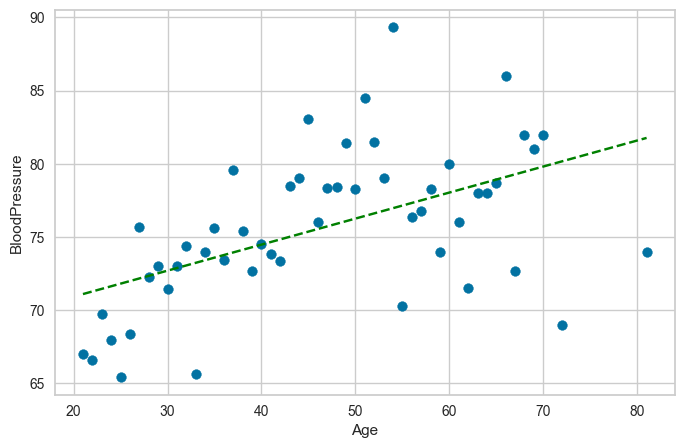

In [326]:
data = pd.DataFrame(df_copy['BloodPressure'].groupby(df_copy['Age']).mean()).reset_index()
x = data['Age']
y = data['BloodPressure']
plt.figure(figsize=(8,5))
plt.scatter(x, y)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--",color ='green')
plt.xlabel('Age')
plt.ylabel('BloodPressure')

plt.show()

<h3 style= 'color:red'> Observations: </h3>

* Overall blood pressure increase with increase in Age.

## 6. Age vs. Pregnancies

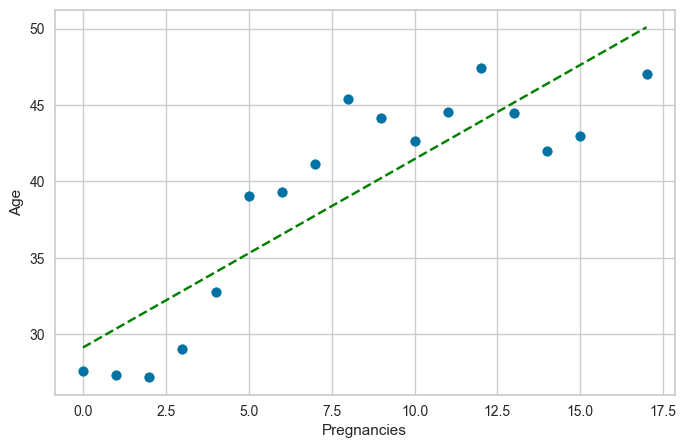

In [327]:
data = pd.DataFrame(df_copy['Age'].groupby(df_copy['Pregnancies']).mean()).reset_index()
x = data['Pregnancies']
y = data['Age']
plt.figure(figsize=(8,5))
plt.scatter(x, y)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--",color ='green')
plt.xlabel('Pregnancies')
plt.ylabel('Age')

plt.show()

**As expected mean age increases with increase in no. of pregnancies**

## 7. Pregnancies Vs. Glucose

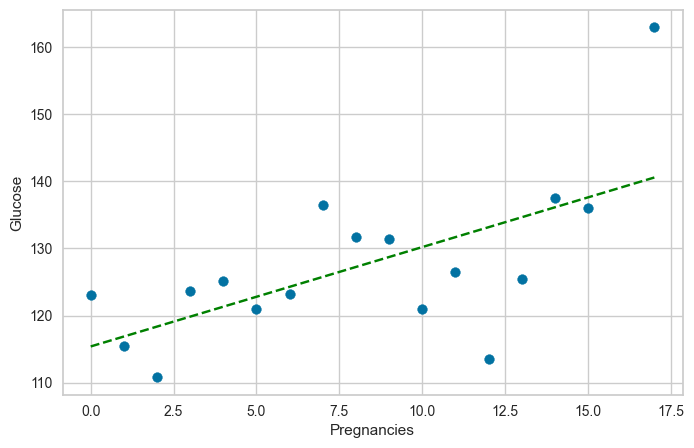

In [328]:
data = pd.DataFrame(df_copy['Glucose'].groupby(df_copy['Pregnancies']).mean()).reset_index()
x = data['Pregnancies']
y = data['Glucose']
plt.figure(figsize=(8,5))
plt.scatter(x, y)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--",color ='green')
plt.xlabel('Pregnancies')
plt.ylabel('Glucose')

plt.show()

## 8. SkinThickness Vs. Age 

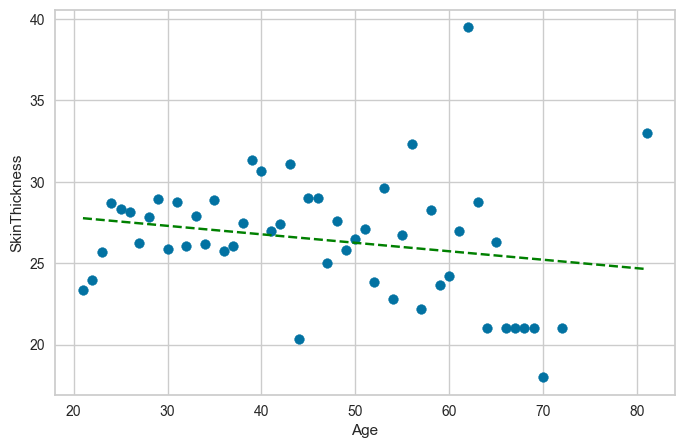

In [329]:
data = pd.DataFrame(df_copy['SkinThickness'].groupby(df_copy['Age']).mean()).reset_index()
x = data['Age']
y = data['SkinThickness']
plt.figure(figsize=(8,5))
plt.scatter(x, y)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--",color ='green')
plt.xlabel('Age')
plt.ylabel('SkinThickness')

plt.show()

<h3 style= 'color:red'> Observations: </h3>

* Skinfold thicknesses measure subcutaneous body fat and, therefore, indicate body composition.
* As expected, skin thickness decreases with age.
* For normal women, skinfold thickness in the range 91-100 is considered good.

In [330]:
# Save the preprocessed data to a file, for further processing in tbleau
df_copy.to_csv("Diabetes data.csv")

# Data Modeling:

In [331]:
x = df_copy.drop(['Outcome'],axis=1)
y = df_copy['Outcome']
seed = 2021

In [332]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state =seed)

In [333]:
printmd("**Shape of x_train : "+str(x_train.shape)+"**",color = 'brown')
printmd("**Shape of y_train : "+str(y_train.shape)+"**",color = 'brown')
printmd("**Shape of x_test : "+str(x_test.shape)+"**",color = 'brown')
printmd("**Shape of y_test : "+str(y_test.shape)+"**",color = 'brown')

<span style='color:brown'>**Shape of x_train : (614, 8)**</span>

<span style='color:brown'>**Shape of y_train : (614,)**</span>

<span style='color:brown'>**Shape of x_test : (154, 8)**</span>

<span style='color:brown'>**Shape of y_test : (154,)**</span>

## 1. Logistic Regression :

In [334]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,roc_auc_score,confusion_matrix

In [335]:
lr = LogisticRegression(random_state = seed,max_iter=1000)

In [336]:
lr.fit(x_train,y_train)

LogisticRegression(max_iter=1000, random_state=2021)

In [337]:
ypred_test1 = lr.predict(x_test)
ypred_train1 = lr.predict(x_train)

Text(0.5, 0, 'Importance')

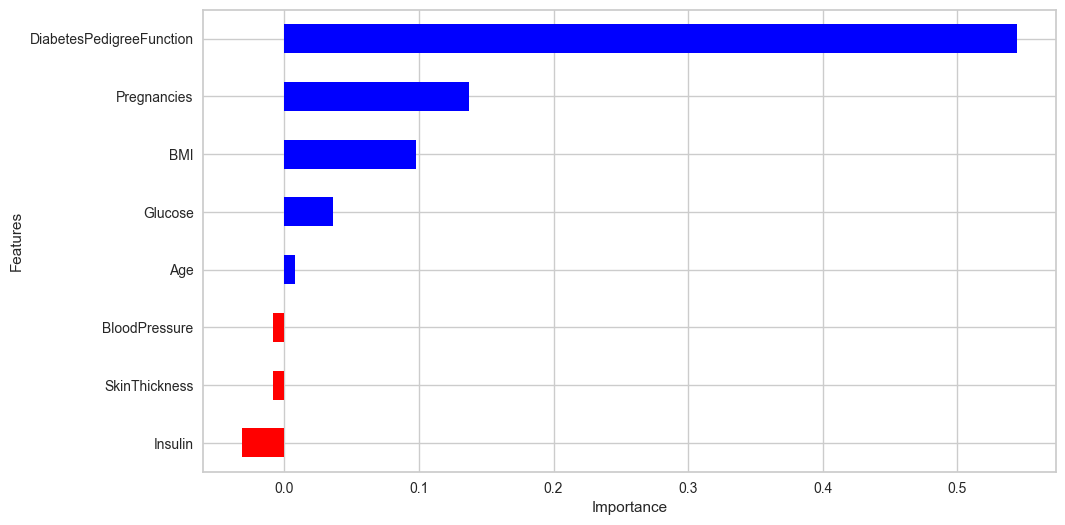

In [338]:
# Plot a bar chart indicating the importance of the features used in the model
coeff = list(lr.coef_[0])
labels = list(x_train.columns)
features = pd.DataFrame()
features['Features'] = labels
features['importance'] = coeff
features.sort_values(by=['importance'], ascending=True, inplace=True)
features['positive'] = features['importance'] > 0
features.set_index('Features', inplace=True)
features.importance.plot(kind='barh', figsize=(11, 6),color = features.positive.map({True: 'blue', False: 'red'}))
plt.xlabel('Importance')

<h3 style= 'color:red'> Observations: </h3>

From above graph we can draw following conclusions - 
* DiabetesPdigreeFuction,Pregnancies,BMI and Glucose have significant influence on model.
* Blood pressure has a negative influence on the prediction, i.e. higher blood pressure is correlated with a person not being diabetic.
* Insulin also has negative influence and have a magnitude same as that of Glucose, which is quite obvious

In [339]:
#visualize performance report
def Performance_report(model,x_train,y_train,x_test,y_test,draw_roc = False):
    viz = ClassificationReport(model,classes = ['No Diabetes','Diabetes'])
    viz.fit(x_train,y_train)
    viz.score(x_test,y_test)
    viz.show();
    
    if draw_roc == True:
        roc = ROCAUC(model,classes = ['No Diabetes','Diabetes'])
        roc.fit(x_train,y_train)
        roc.score(x_test,y_test)
        roc.show();

In [340]:
print(classification_report(y_test,ypred_test1))

              precision    recall  f1-score   support

           0       0.78      0.89      0.83        97
           1       0.75      0.58      0.65        57

    accuracy                           0.77       154
   macro avg       0.77      0.73      0.74       154
weighted avg       0.77      0.77      0.77       154



In [341]:
print(colored("confusion matrix for test data :\n",'red',attrs =['bold']), confusion_matrix(y_test,ypred_test1))
print(colored("confusion matrix for train data :\n",'red',attrs =['bold']), confusion_matrix(y_train,ypred_train1))

confusion matrix for test data :
 [[86 11]
 [24 33]]
confusion matrix for train data :
 [[354  49]
 [ 95 116]]


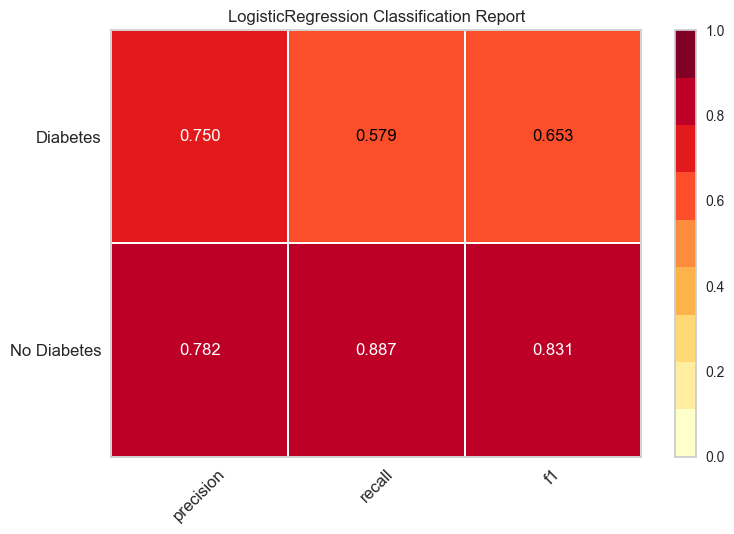

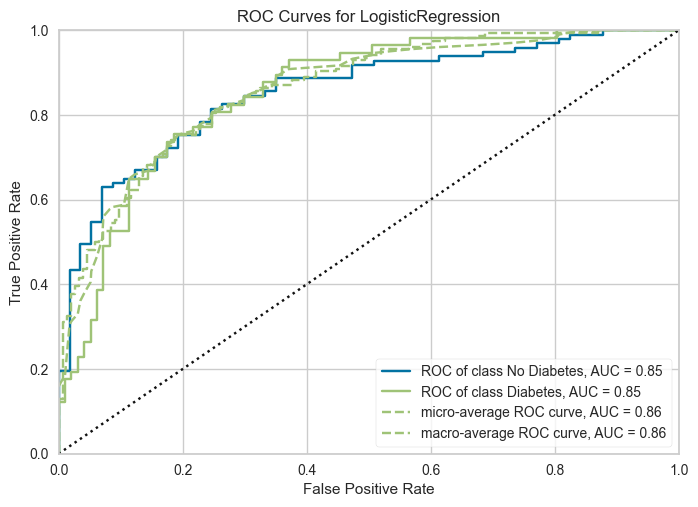

In [342]:
from yellowbrick.classifier import ClassificationReport,ROCAUC
from yellowbrick.classifier.rocauc import roc_auc
Performance_report(model = lr,x_train= x_train,y_train=y_train,x_test=x_test,y_test=y_test,draw_roc = True)

<h3 style= 'color:red'> Observations: </h3>

* The sensitivity/recall means "how many of this class you find over the whole number of element of this class"

* The precision will be "how many are correctly classified among that class"

* The f1-score is the harmonic mean between precision & recall

* The support is the number of occurence of the given class in your dataset. We got support of 97 for class 0 and 57 for class 1. This also implies that our dataset is imbalanced.
* In such cases precision and recall is better matrix to determine the accuracy of the model

* Using logistic regression we got a 
    - Precision as 78% and recall as 89% for predicting diabetic patients
    - Precision as 75% and recall as 58% for predicting non-diabetic patients
    
**Thus, Logistic regression is better to find class 0 over class 1**

* From the AUCROC curve, we got AUC of 0.85.
* When AUC is 0.85, it means there is a 85% chance that the model will be able to distinguish between positive class and negative class.



In [343]:
# we will create a datafram to record and compare precision and recall of both the classes for each model
dict = {'Model Name':['Logistic Regression'],
        'Precision_no_diabetes':[0.78],
        'Precision_diabetes':[0.75],
        'Recall_no_diabetes':[0.89],
        'Recall_diabetes':[0.58],
        'AUC':[0.85]
       }
result = pd.DataFrame(dict)
result

Model Name  Precision_no_diabetes  Precision_diabetes  \
0  Logistic Regression                   0.78                0.75   

   Recall_no_diabetes  Recall_diabetes   AUC  
0                0.89             0.58  0.85

# 2. Decision Tree Classifier :

In [344]:
from sklearn.tree import DecisionTreeClassifier

In [345]:
clf = DecisionTreeClassifier(max_depth = 4,min_samples_leaf = 1,random_state = seed)
clf.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4, random_state=2021)

Pregnancies                 0.029146
Glucose                     0.537124
BloodPressure               0.016257
SkinThickness               0.019361
Insulin                     0.000000
BMI                         0.234443
DiabetesPedigreeFunction    0.023335
Age                         0.140334
dtype: float64

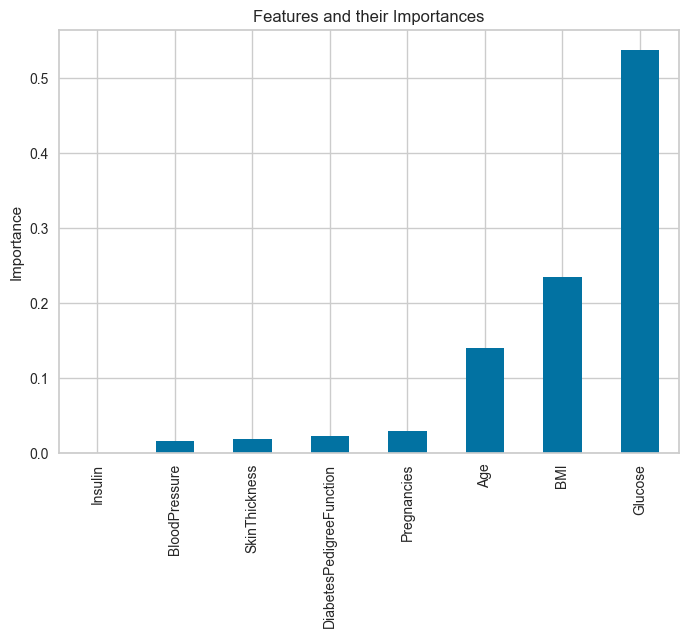

In [346]:
#Feature Importances for Decision Tree Classifier
feature_imp = pd.Series(clf.feature_importances_, index = x_train.columns)
feature_imp.sort_values().plot(kind = 'bar')
plt.ylabel('Importance')
plt.title("Features and their Importances")
feature_imp

<h3 style= 'color:red'> Observations: </h3>

* Glucose, BMI and Age has highest significance in classifying the diabetic and non-diabetic patients with decision tree classifier
* Insulin is not significant for decision tree.

In [347]:
clf.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4, random_state=2021)

In [348]:
ypred_test2 = clf.predict(x_test)
ypred_train2 = clf.predict(x_train)
print(classification_report(y_test,ypred_test2))

              precision    recall  f1-score   support

           0       0.80      0.75      0.78        97
           1       0.62      0.68      0.65        57

    accuracy                           0.73       154
   macro avg       0.71      0.72      0.71       154
weighted avg       0.73      0.73      0.73       154



confusion matrix for test data :
 [[73 24]
 [18 39]]
confusion matrix for train data :
 [[324  79]
 [ 40 171]]


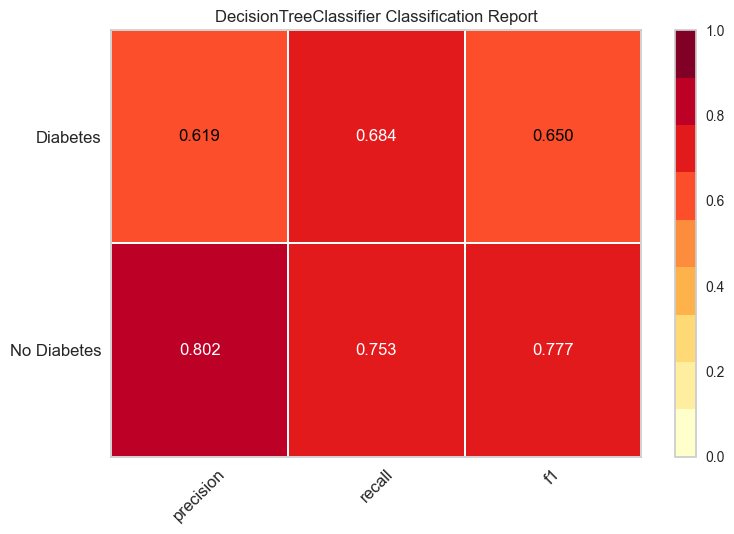

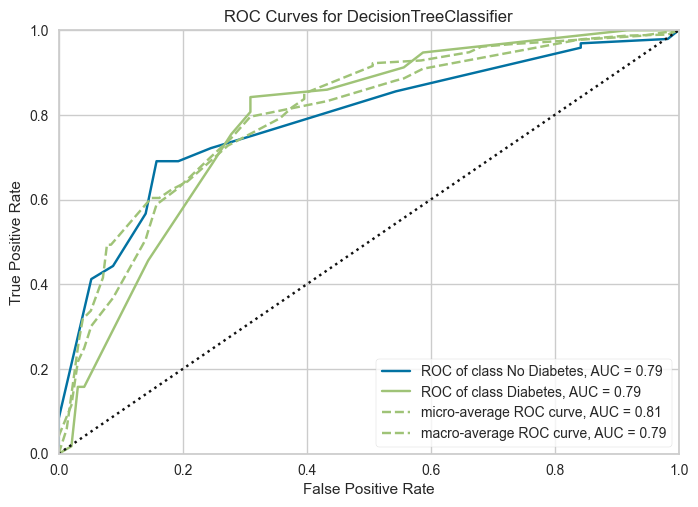

In [349]:
print(colored("confusion matrix for test data :\n",'red',attrs =['bold']), confusion_matrix(y_test,ypred_test2))
print(colored("confusion matrix for train data :\n",'red',attrs =['bold']), confusion_matrix(y_train,ypred_train2))
Performance_report(model = clf,x_train= x_train,y_train=y_train,x_test=x_test,y_test=y_test,draw_roc = True)

In [350]:
# Append a row of decision tree output in the result dataframe
result.loc[len(result.index)] = ['Decision Tree Classifier',0.8,0.61,0.75,0.68,0.79]
result

Model Name  Precision_no_diabetes  Precision_diabetes  \
0       Logistic Regression                   0.78                0.75   
1  Decision Tree Classifier                   0.80                0.61   

   Recall_no_diabetes  Recall_diabetes   AUC  
0                0.89             0.58  0.85  
1                0.75             0.68  0.79

<h3 style= 'color:red'> Observations: </h3>

* Using Decision tree classifier we got - 
    - Precision as 80% and recall as 75% for classifying non-diabetic patients
    - Precision as 61% and recall as 68% for classifying diabetic patients
* Decision tree is better in identifying diabetic over non-diabetic. 
* The decision tree doesn't perform very well in prediting diabetic patients from entire data(Recall -> 0.75 for non-diabetic and 0.68 for diabetic classification). 
* However, Decision tree classifies diabetic patiencts more precisely than non-diabetic. It also classifies non-diabetic patients more precisely than logistic regression.
* From AUCROC curve, we got AUC of 0.79
* When AUC is 0.79, it means there is a 79% chance that the model will be able to distinguish between positive class and negative class.


# 3. RandomForest Classifier : 

In [351]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier( n_estimators=1000, random_state = seed,max_depth = 10)
rfc.fit(x_train,y_train)

RandomForestClassifier(max_depth=10, n_estimators=1000, random_state=2021)

Pregnancies                 0.082664
Glucose                     0.258904
BloodPressure               0.079100
SkinThickness               0.066971
Insulin                     0.082230
BMI                         0.162421
DiabetesPedigreeFunction    0.124718
Age                         0.142993
dtype: float64

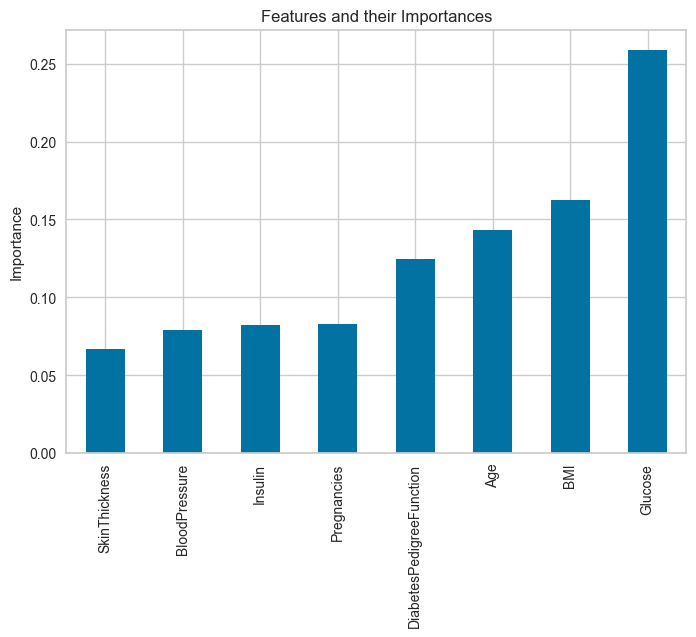

In [352]:
#Feature Importances for Random Forest Classifier
feature_imp = pd.Series(rfc.feature_importances_, index = x_train.columns)
feature_imp.sort_values().plot(kind = 'bar')
plt.ylabel('Importance')
plt.title("Features and their Importances")
feature_imp

<h3 style= 'color:red'> Observations: </h3>

* For random forest classifier, all features are significant.
* Glucose, BMI, Age and DiabetesPedigreeFunction has highest importance

In [353]:
rfc.feature_importances_[rfc.feature_importances_<0.08]

array([0.07909994, 0.06697052])

In [354]:
ypred_test3 = rfc.predict(x_test)
ypred_train3 = rfc.predict(x_train)
print(classification_report(y_test,ypred_test3))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83        97
           1       0.74      0.60      0.66        57

    accuracy                           0.77       154
   macro avg       0.76      0.74      0.74       154
weighted avg       0.77      0.77      0.77       154



confusion matrix for test data :
 [[85 12]
 [23 34]]
confusion matrix for train data :
 [[403   0]
 [  1 210]]


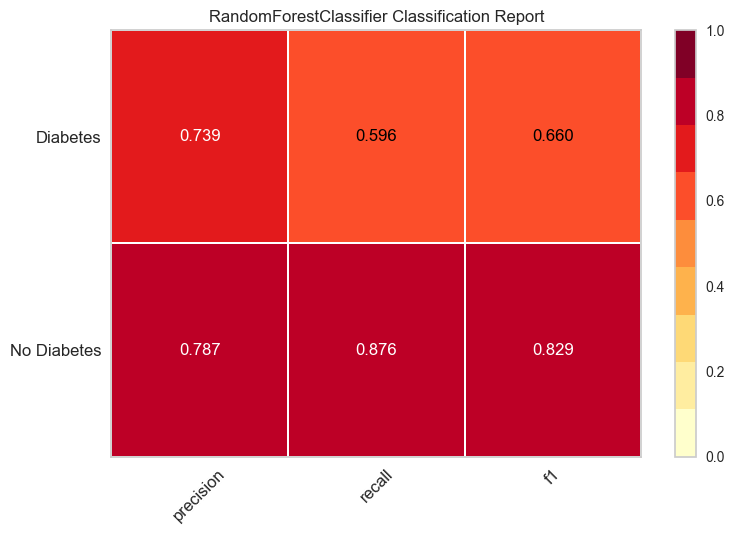

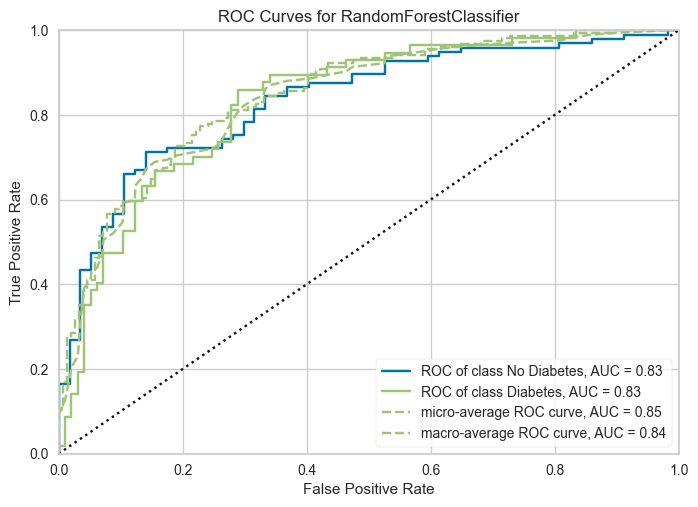

In [355]:
print(colored("confusion matrix for test data :\n",'red',attrs =['bold']), confusion_matrix(y_test,ypred_test3))
print(colored("confusion matrix for train data :\n",'red',attrs =['bold']), confusion_matrix(y_train,ypred_train3))
Performance_report(model = rfc,x_train= x_train,y_train=y_train,x_test=x_test,y_test=y_test,draw_roc = True)

In [356]:
# Append a row of decision tree output in the result dataframe
#columns = (Model Name, Class 0_precision, Class 1_precision, Class 0_recall, Class 1_recall)
result.loc[len(result.index)] = ['Random Forest Classifier',0.77,0.7,0.86,0.58,0.83]
result

Model Name  Precision_no_diabetes  Precision_diabetes  \
0       Logistic Regression                   0.78                0.75   
1  Decision Tree Classifier                   0.80                0.61   
2  Random Forest Classifier                   0.77                0.70   

   Recall_no_diabetes  Recall_diabetes   AUC  
0                0.89             0.58  0.85  
1                0.75             0.68  0.79  
2                0.86             0.58  0.83

<h3 style= 'color:red'> Observations: </h3>

* Using Random forest classifier we got - 
    - Precision as 77% and recall as 86% for Non-diabetic class
    - Precision as 70% and recall as 58% for diabetic class
* Random forest is better in identifying non-diabetic over diabetic patients. 
* From AUCROC curve, we got AUC of 0.83
* When AUC is 0.83, it means there is a 83% chance that the model will be able to distinguish between positive class and negative class.


# 4. SVM :

In [357]:
from sklearn.svm import SVC
svc = SVC(random_state = seed)

In [358]:
svc.fit(x_train,y_train)

SVC(random_state=2021)

In [359]:
ypred_test4 = svc.predict(x_test)
ypred_train4 = svc.predict(x_train)
print(classification_report(y_test,ypred_test4))

              precision    recall  f1-score   support

           0       0.75      0.94      0.83        97
           1       0.81      0.46      0.58        57

    accuracy                           0.76       154
   macro avg       0.78      0.70      0.71       154
weighted avg       0.77      0.76      0.74       154



In [360]:
from sklearn import metrics

confusion matrix for test data :
 [[91  6]
 [31 26]]
confusion matrix for train data :
 [[366  37]
 [113  98]]


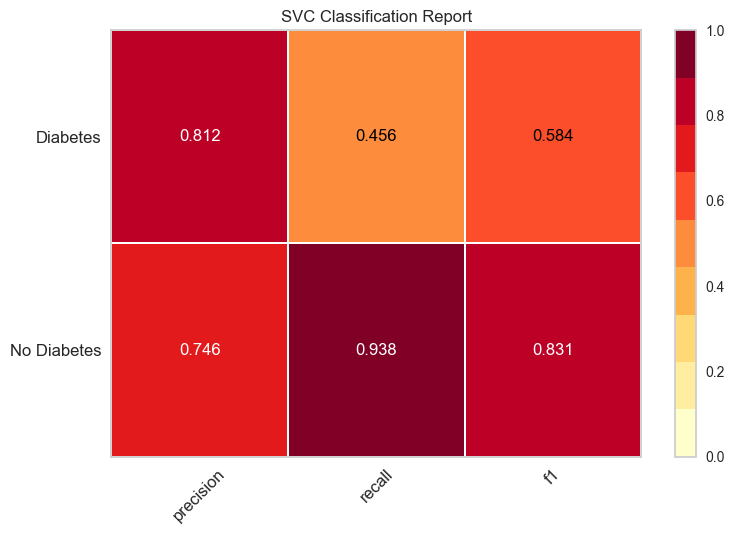

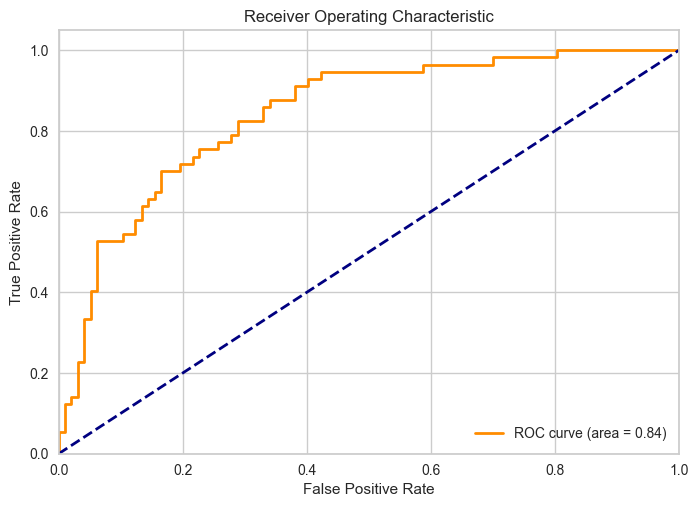

In [361]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
from termcolor import colored
import matplotlib.pyplot as plt

print(colored("confusion matrix for test data :\n", 'red', attrs=['bold']), confusion_matrix(y_test, ypred_test4))
print(colored("confusion matrix for train data :\n", 'red', attrs=['bold']), confusion_matrix(y_train, ypred_train4))
Performance_report(model=svc, x_train=x_train, y_train=y_train, x_test=x_test, y_test=y_test, draw_roc=False)

# Compute ROC curve data
fpr, tpr, thresholds = roc_curve(y_test, svc.decision_function(x_test))
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [362]:
# Append a row of decision tree output in the result dataframe
#columns = (Model Name, Class 0_precision, Class 1_precision, Class 0_recall, Class 1_recall)
result.loc[len(result.index)] = ['Support Vector Classifier',0.75,0.81,0.94,0.46,0.84]
result

Model Name  Precision_no_diabetes  Precision_diabetes  \
0        Logistic Regression                   0.78                0.75   
1   Decision Tree Classifier                   0.80                0.61   
2   Random Forest Classifier                   0.77                0.70   
3  Support Vector Classifier                   0.75                0.81   

   Recall_no_diabetes  Recall_diabetes   AUC  
0                0.89             0.58  0.85  
1                0.75             0.68  0.79  
2                0.86             0.58  0.83  
3                0.94             0.46  0.84

<h3 style= 'color:red'> Observations: </h3>

* Using Support Vector classifier we got - 
    - Precision as 75% and recall as 94% for Non-diabetic class
    - Precision as 81% and recall as 46% for diabetic class 
* From AUCROC curve, we got AUC of 0.84
* When AUC is 0.84, it means there is a 84% chance that the model will be able to distinguish between positive class and negative class.
* The SVC model classifies diabetic and non diabetic patients with almost same precision.
* Sensitivity(Recall) is higher for non-diabetic class .
* High sensitivity implies that if any person who has the disease is likely to be classified as positive by the test. 
* On the other hand, if the specificity is high, any person who does not have the disease is likely to be classified as negative by the test.

# 5. Naive Bayes : 

In [363]:
from sklearn.naive_bayes import GaussianNB
naive = GaussianNB()

In [364]:
naive.fit(x_train,y_train)

GaussianNB()

In [365]:
ypred_test5 = naive.predict(x_test)
ypred_train5 = naive.predict(x_train)
print(classification_report(y_test,ypred_test5))

              precision    recall  f1-score   support

           0       0.78      0.86      0.82        97
           1       0.71      0.60      0.65        57

    accuracy                           0.76       154
   macro avg       0.75      0.73      0.73       154
weighted avg       0.76      0.76      0.75       154



confusion matrix for test data :
 [[83 14]
 [23 34]]
confusion matrix for train data :
 [[339  64]
 [ 83 128]]


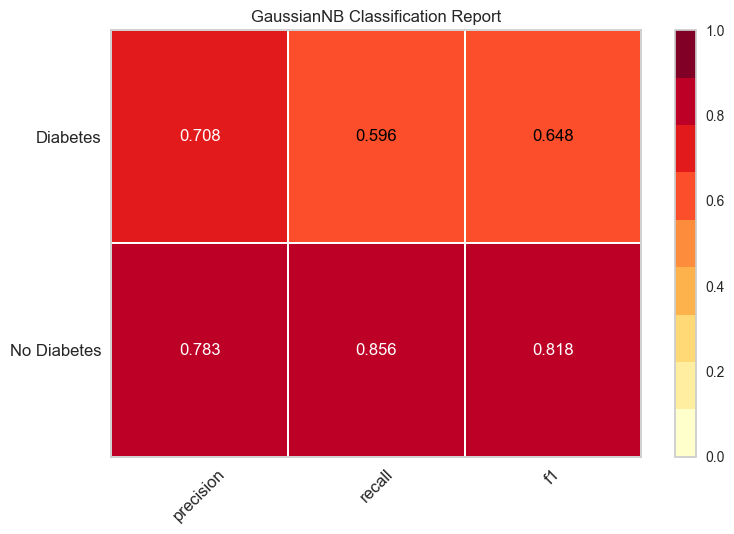

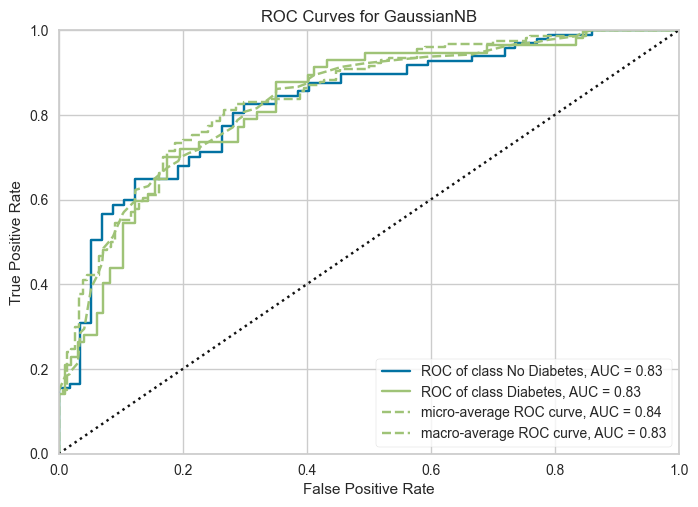

In [366]:
print(colored("confusion matrix for test data :\n",'red',attrs =['bold']), confusion_matrix(y_test,ypred_test5))
print(colored("confusion matrix for train data :\n",'red',attrs =['bold']), confusion_matrix(y_train,ypred_train5))
Performance_report(model = naive,x_train= x_train,y_train=y_train,x_test=x_test,y_test=y_test,draw_roc = True)

In [367]:
# Append a row of decision tree output in the result dataframe
#columns = (Model Name, Class 0_precision, Class 1_precision, Class 0_recall, Class 1_recall)
result.loc[len(result.index)] = ['Naive Bayes Classifier',0.78,0.71,0.86,0.60,0.83]
result

Model Name  Precision_no_diabetes  Precision_diabetes  \
0        Logistic Regression                   0.78                0.75   
1   Decision Tree Classifier                   0.80                0.61   
2   Random Forest Classifier                   0.77                0.70   
3  Support Vector Classifier                   0.75                0.81   
4     Naive Bayes Classifier                   0.78                0.71   

   Recall_no_diabetes  Recall_diabetes   AUC  
0                0.89             0.58  0.85  
1                0.75             0.68  0.79  
2                0.86             0.58  0.83  
3                0.94             0.46  0.84  
4                0.86             0.60  0.83

<h3 style= 'color:red'> Observations: </h3>

* Using Naive Bayes classifier we got - 
    - Precision as 78% and recall as 86% for Non-diabetic class
    - Precision as 71% and recall as 60% for diabetic class 
* From AUCROC curve, we got AUC of 0.83
* When AUC is 0.83, it means there is a 83% chance that the model will be able to distinguish between positive class and negative class.
* The naive bayes model classifies diabetic and non diabetic patients with almost same precision. i.e if the patient has diabetes, he will be classified as positive with a precision of 81% out of all the predictions made by the model.
* Sensitivity(Recall) is higher for non-diabetic predictions . Thus, the model identifies non diabetic patients more clearly than diabtic patients. However, all the predictions are made with more or less same precision. 

# 6. KNN Classifier : 

In [368]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=4)

In [369]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=4)

In [370]:
ypred_test6 = knn.predict(x_test)
ypred_train6 = knn.predict(x_train)
print(classification_report(y_test,ypred_test6))

              precision    recall  f1-score   support

           0       0.74      0.87      0.80        97
           1       0.68      0.49      0.57        57

    accuracy                           0.73       154
   macro avg       0.71      0.68      0.69       154
weighted avg       0.72      0.73      0.72       154



confusion matrix for test data :
 [[84 13]
 [29 28]]
confusion matrix for train data :
 [[381  22]
 [ 96 115]]


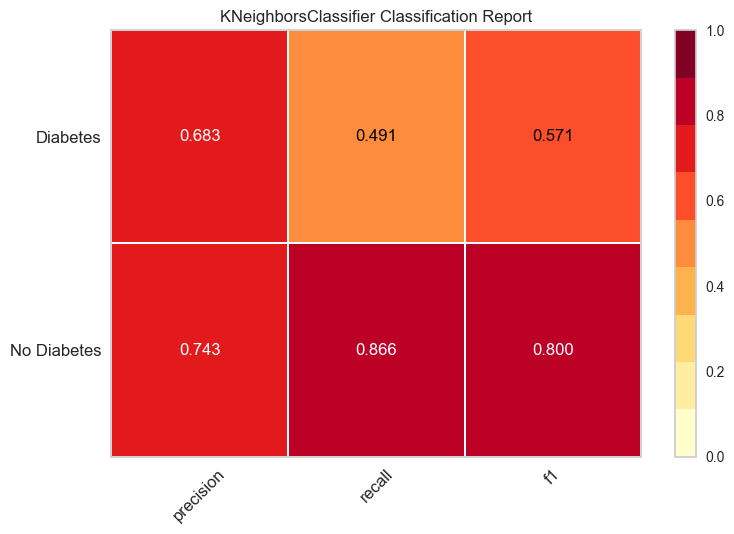

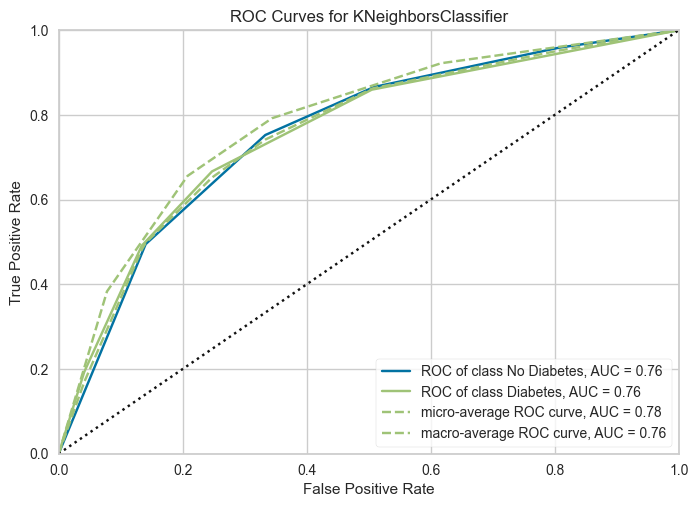

In [371]:
print(colored("confusion matrix for test data :\n",'red',attrs =['bold']), confusion_matrix(y_test,ypred_test6))
print(colored("confusion matrix for train data :\n",'red',attrs =['bold']), confusion_matrix(y_train,ypred_train6))
Performance_report(model = knn,x_train= x_train,y_train=y_train,x_test=x_test,y_test=y_test,draw_roc = True)

In [372]:
# Append a row of decision tree output in the result dataframe
#columns = (Model Name, Class 0_precision, Class 1_precision, Class 0_recall, Class 1_recall)
result.loc[len(result.index)] = ['KNeighbors Classifier',0.74,0.68,0.87,0.49,0.76]
result

Model Name  Precision_no_diabetes  Precision_diabetes  \
0        Logistic Regression                   0.78                0.75   
1   Decision Tree Classifier                   0.80                0.61   
2   Random Forest Classifier                   0.77                0.70   
3  Support Vector Classifier                   0.75                0.81   
4     Naive Bayes Classifier                   0.78                0.71   
5      KNeighbors Classifier                   0.74                0.68   

   Recall_no_diabetes  Recall_diabetes   AUC  
0                0.89             0.58  0.85  
1                0.75             0.68  0.79  
2                0.86             0.58  0.83  
3                0.94             0.46  0.84  
4                0.86             0.60  0.83  
5                0.87             0.49  0.76

<h3 style= 'color:red'> Observations: </h3>

* Using K-Neighbors classifier we got - 
    - Precision as 74% and recall as 87% for Non-diabetic class
    - Precision as 68% and recall as 49% for diabetic class 
* From AUCROC curve, we got AUC of 0.76
* When AUC is 0.76, it means there is a 76% chance that the model will be able to distinguish between positive class and negative class.
* This is the lowest AUC value we got till now, using KNN. Low AUC value indicates weak capacity of model in distinguishing the two classes. 
* The model classifies diabetic and non diabetic patients with almost same precision.
* Sensitivity(Recall) is higher for prediction of non diabetic patients. Thus, if a patient doesn't have diabetes, out of all the actual non-diabetic patients, the model will identify 87% of the non-diabetic patients
* If a patient has diabetes, then out of all the predictions made, 49% are classified as diabetic. 

# 7. XGB Classifier

In [373]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state = seed,n_estimators=50)

In [374]:
xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, random_state=2021, ...)

In [375]:
ypred_test7 = xgb.predict(x_test)
ypred_train7 = xgb.predict(x_train)
print(classification_report(y_test,ypred_test7))

              precision    recall  f1-score   support

           0       0.78      0.80      0.79        97
           1       0.65      0.61      0.63        57

    accuracy                           0.73       154
   macro avg       0.71      0.71      0.71       154
weighted avg       0.73      0.73      0.73       154



confusion matrix for test data :
 [[78 19]
 [22 35]]
confusion matrix for train data :
 [[403   0]
 [  0 211]]


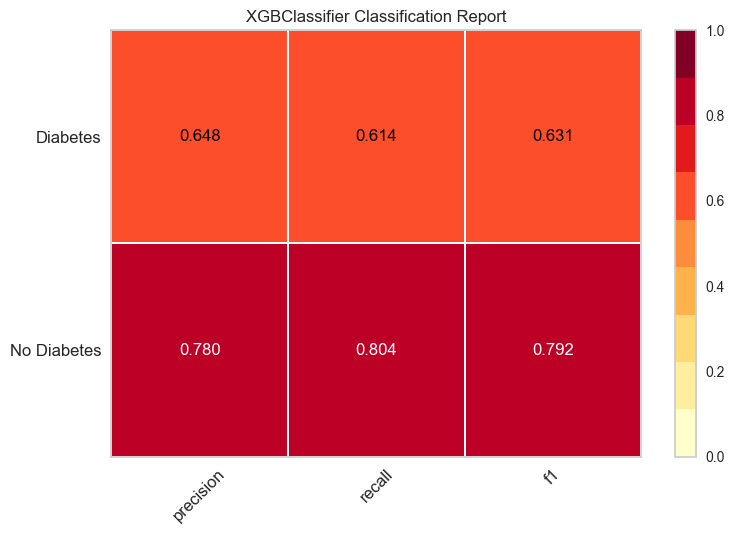

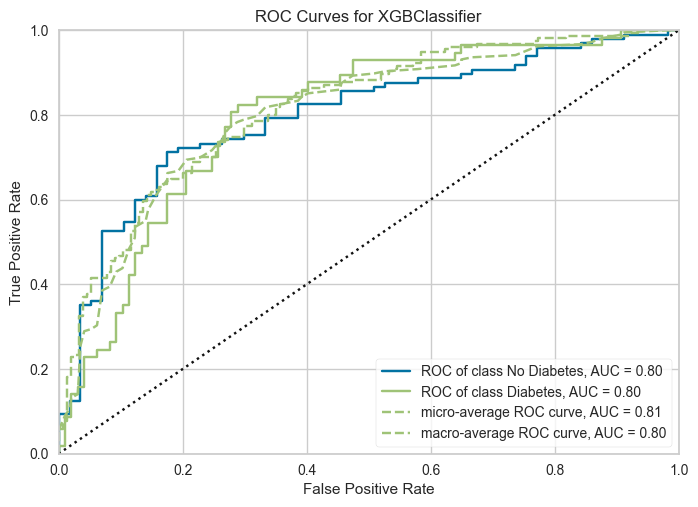

In [376]:
print(colored("confusion matrix for test data :\n",'red',attrs =['bold']), confusion_matrix(y_test,ypred_test7))
print(colored("confusion matrix for train data :\n",'red',attrs =['bold']), confusion_matrix(y_train,ypred_train7))
Performance_report(model = xgb,x_train= x_train,y_train=y_train,x_test=x_test,y_test=y_test,draw_roc = True)

In [377]:
# Append a row of decision tree output in the result dataframe
#columns = (Model Name, Class 0_precision, Class 1_precision, Class 0_recall, Class 1_recall)
result.loc[len(result.index)] = ['XGBoost Classifier',0.80,0.68,0.81,0.67,0.82]
result

Model Name  Precision_no_diabetes  Precision_diabetes  \
0        Logistic Regression                   0.78                0.75   
1   Decision Tree Classifier                   0.80                0.61   
2   Random Forest Classifier                   0.77                0.70   
3  Support Vector Classifier                   0.75                0.81   
4     Naive Bayes Classifier                   0.78                0.71   
5      KNeighbors Classifier                   0.74                0.68   
6         XGBoost Classifier                   0.80                0.68   

   Recall_no_diabetes  Recall_diabetes   AUC  
0                0.89             0.58  0.85  
1                0.75             0.68  0.79  
2                0.86             0.58  0.83  
3                0.94             0.46  0.84  
4                0.86             0.60  0.83  
5                0.87             0.49  0.76  
6                0.81             0.67  0.82

<h3 style= 'color:red'> Observations: </h3>

* Using XGboost classifier we got - 
    - Precision as 80% and recall as 81% for Non-diabetic class
    - Precision as 68% and recall as 67% for diabetic class 
* From AUCROC curve, we got AUC of 0.82
* When AUC is 0.82, it means there is a 82% chance that the model will be able to distinguish between positive class and negative class.
* The model is identical to decision tree with improved classifying power(since base learners in xgboost are decisoon trees) 

# 8. Catboost Classifier

In [378]:
from catboost import CatBoostClassifier
catb = CatBoostClassifier(random_state = seed)

In [379]:
catb.fit(x_train,y_train)

Learning rate set to 0.008365
0:	learn: 0.6881048	total: 45ms	remaining: 45s
1:	learn: 0.6834814	total: 69.1ms	remaining: 34.5s
2:	learn: 0.6795747	total: 78.6ms	remaining: 26.1s
3:	learn: 0.6746892	total: 100ms	remaining: 25s
4:	learn: 0.6701263	total: 106ms	remaining: 21.1s
5:	learn: 0.6664153	total: 113ms	remaining: 18.8s
6:	learn: 0.6629563	total: 131ms	remaining: 18.6s
7:	learn: 0.6592236	total: 164ms	remaining: 20.3s
8:	learn: 0.6556278	total: 214ms	remaining: 23.6s
9:	learn: 0.6528290	total: 238ms	remaining: 23.6s
10:	learn: 0.6482625	total: 259ms	remaining: 23.2s
11:	learn: 0.6447832	total: 267ms	remaining: 22s
12:	learn: 0.6422559	total: 278ms	remaining: 21.1s
13:	learn: 0.6387186	total: 314ms	remaining: 22.1s
14:	learn: 0.6353139	total: 340ms	remaining: 22.3s
15:	learn: 0.6321159	total: 363ms	remaining: 22.3s
16:	learn: 0.6293626	total: 388ms	remaining: 22.4s
17:	learn: 0.6264127	total: 427ms	remaining: 23.3s
18:	learn: 0.6225716	total: 443ms	remaining: 22.9s
19:	learn: 0.620

62:	learn: 0.5182660	total: 1.04s	remaining: 15.4s
63:	learn: 0.5167069	total: 1.04s	remaining: 15.2s
64:	learn: 0.5147746	total: 1.05s	remaining: 15s
65:	learn: 0.5133827	total: 1.06s	remaining: 15s
66:	learn: 0.5118348	total: 1.07s	remaining: 14.9s
67:	learn: 0.5103101	total: 1.09s	remaining: 15s
68:	learn: 0.5091468	total: 1.1s	remaining: 14.8s
69:	learn: 0.5075631	total: 1.12s	remaining: 14.9s
70:	learn: 0.5060049	total: 1.13s	remaining: 14.8s
71:	learn: 0.5044067	total: 1.13s	remaining: 14.6s
72:	learn: 0.5029825	total: 1.14s	remaining: 14.5s
73:	learn: 0.5012076	total: 1.15s	remaining: 14.4s
74:	learn: 0.4998297	total: 1.17s	remaining: 14.4s
75:	learn: 0.4980413	total: 1.18s	remaining: 14.4s
76:	learn: 0.4967852	total: 1.19s	remaining: 14.3s
77:	learn: 0.4953439	total: 1.21s	remaining: 14.3s
78:	learn: 0.4939024	total: 1.22s	remaining: 14.3s
79:	learn: 0.4926439	total: 1.24s	remaining: 14.3s
80:	learn: 0.4911143	total: 1.25s	remaining: 14.2s
81:	learn: 0.4896415	total: 1.25s	rema

In [380]:
ypred_test8 = catb.predict(x_test)
ypred_train8 = catb.predict(x_train)
print(classification_report(y_test,ypred_test8))

              precision    recall  f1-score   support

           0       0.80      0.85      0.82        97
           1       0.71      0.63      0.67        57

    accuracy                           0.77       154
   macro avg       0.75      0.74      0.74       154
weighted avg       0.76      0.77      0.76       154



confusion matrix for test data :
 [[82 15]
 [21 36]]
confusion matrix for train data :
 [[397   6]
 [ 26 185]]


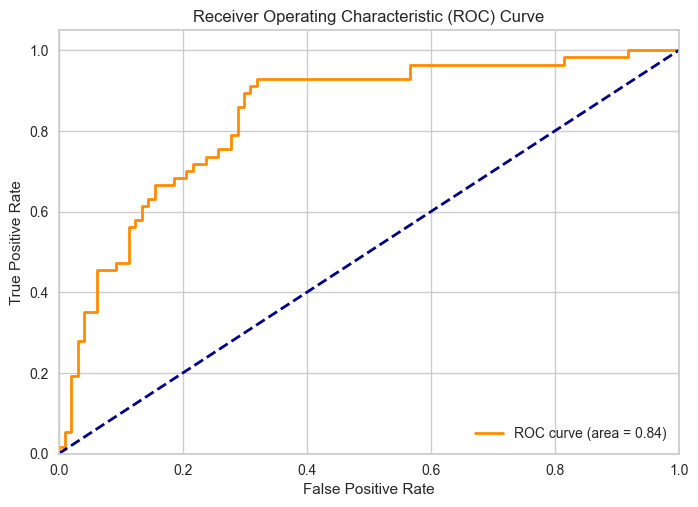

In [381]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
from termcolor import colored
import matplotlib.pyplot as plt

print(colored("confusion matrix for test data :\n",'red',attrs =['bold']), confusion_matrix(y_test,ypred_test8))
print(colored("confusion matrix for train data :\n",'red',attrs =['bold']), confusion_matrix(y_train,ypred_train8))

# Compute ROC curve data
fpr, tpr, thresholds = roc_curve(y_test, catb.predict_proba(x_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [382]:
# Append a row of decision tree output in the result dataframe
#columns = (Model Name, Class 0_precision, Class 1_precision, Class 0_recall, Class 1_recall)
result.loc[len(result.index)] = ['Catboost Classifier',0.80,0.71,0.85,0.63,0.84]
result

Model Name  Precision_no_diabetes  Precision_diabetes  \
0        Logistic Regression                   0.78                0.75   
1   Decision Tree Classifier                   0.80                0.61   
2   Random Forest Classifier                   0.77                0.70   
3  Support Vector Classifier                   0.75                0.81   
4     Naive Bayes Classifier                   0.78                0.71   
5      KNeighbors Classifier                   0.74                0.68   
6         XGBoost Classifier                   0.80                0.68   
7        Catboost Classifier                   0.80                0.71   

   Recall_no_diabetes  Recall_diabetes   AUC  
0                0.89             0.58  0.85  
1                0.75             0.68  0.79  
2                0.86             0.58  0.83  
3                0.94             0.46  0.84  
4                0.86             0.60  0.83  
5                0.87             0.49  0.76  
6                0.81             0.67  0.82  
7                0.85             0.63  0.84

<h3 style= 'color:red'> Observations: </h3>

* Using Catboost classifier we got - 
    - Precision as 80% and recall as 85% for Non-diabetic class
    - Precision as 71% and recall as 63% for diabetic class 
* From AUCROC curve, we got AUC of 0.84
* When AUC is 0.84, it means there is a 84% chance that the model will be able to distinguish between positive class and negative class.
* The model has higher precision and recall for both the classes. Such model can be cosidered as good classification model.

# 9. LGBM Classifier :

In [383]:
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier(random_state = seed,n_estimators=100,learning_rate=0.3)

In [384]:
lgbm.fit(x_train,y_train)

[LightGBM] [Info] Number of positive: 211, number of negative: 403
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000312 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 669
[LightGBM] [Info] Number of data points in the train set: 614, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.343648 -> initscore=-0.647078
[LightGBM] [Info] Start training from score -0.647078
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


LGBMClassifier(learning_rate=0.3, random_state=2021)

In [385]:
ypred_test9 = lgbm.predict(x_test)
ypred_train9 = lgbm.predict(x_train)
print(classification_report(y_test,ypred_test9))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80        97
           1       0.66      0.68      0.67        57

    accuracy                           0.75       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.76      0.75      0.75       154



confusion matrix for test data :
 [[77 20]
 [18 39]]
confusion matrix for train data :
 [[403   0]
 [  0 211]]


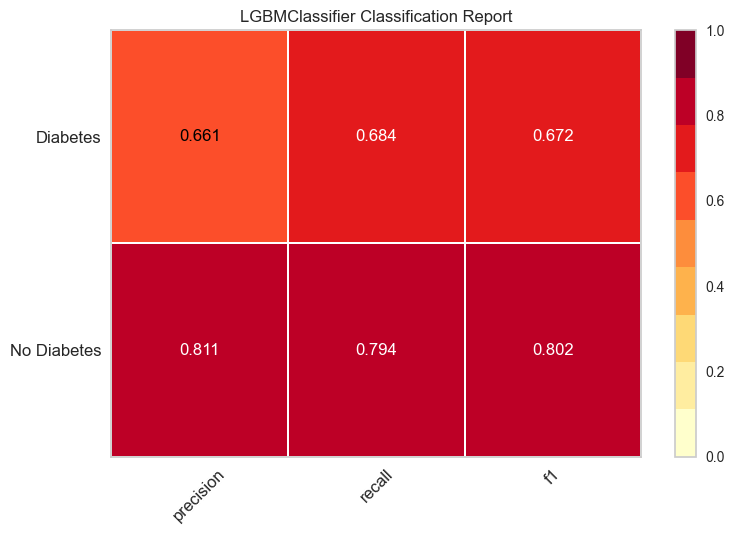

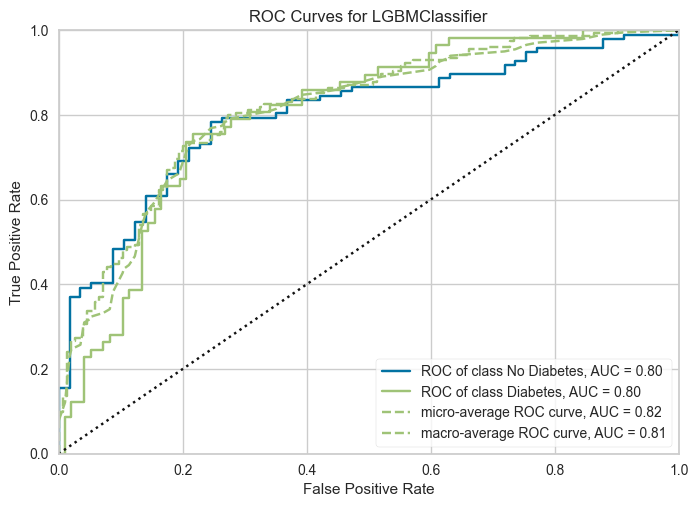

In [386]:
print(colored("confusion matrix for test data :\n",'red',attrs =['bold']), confusion_matrix(y_test,ypred_test9))
print(colored("confusion matrix for train data :\n",'red',attrs =['bold']), confusion_matrix(y_train,ypred_train9))
Performance_report(model =lgbm,x_train= x_train,y_train=y_train,x_test=x_test,y_test=y_test,draw_roc = True)

In [387]:
# Append a row of decision tree output in the result dataframe
#columns = (Model Name, Class 0_precision, Class 1_precision, Class 0_recall, Class 1_recall)
result.loc[len(result.index)] = ['LightGbm Classifier',0.81,0.66,0.79,0.68,0.8]
result

Model Name  Precision_no_diabetes  Precision_diabetes  \
0        Logistic Regression                   0.78                0.75   
1   Decision Tree Classifier                   0.80                0.61   
2   Random Forest Classifier                   0.77                0.70   
3  Support Vector Classifier                   0.75                0.81   
4     Naive Bayes Classifier                   0.78                0.71   
5      KNeighbors Classifier                   0.74                0.68   
6         XGBoost Classifier                   0.80                0.68   
7        Catboost Classifier                   0.80                0.71   
8        LightGbm Classifier                   0.81                0.66   

   Recall_no_diabetes  Recall_diabetes   AUC  
0                0.89             0.58  0.85  
1                0.75             0.68  0.79  
2                0.86             0.58  0.83  
3                0.94             0.46  0.84  
4                0.86             0.60  0.83  
5                0.87             0.49  0.76  
6                0.81             0.67  0.82  
7                0.85             0.63  0.84  
8                0.79             0.68  0.80

<h3 style= 'color:red'> Observations: </h3>

* Using Light GBM classifier we got - 
    - Precision as 81% and recall as 79% for Non-diabetic class
    - Precision as 66% and recall as 68% for diabetic class 
* From AUCROC curve, we got AUC of 0.80
* When AUC is 0.80, it means there is a 80% chance that the model will be able to distinguish between positive class and negative class.
* This model also has high precision and moderate recall. This model is also a good classifier for the problem in hand

# 10. GBM Classifier : 

In [388]:
from sklearn.ensemble import GradientBoostingClassifier
gbm = GradientBoostingClassifier(random_state = seed)

In [389]:
gbm.fit(x_train,y_train)

GradientBoostingClassifier(random_state=2021)

In [390]:
ypred_test10 = gbm.predict(x_test)
ypred_train10 = gbm.predict(x_train)
print(classification_report(y_test,ypred_test10))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83        97
           1       0.72      0.63      0.67        57

    accuracy                           0.77       154
   macro avg       0.76      0.74      0.75       154
weighted avg       0.77      0.77      0.77       154



confusion matrix for test data :
 [[83 14]
 [21 36]]
confusion matrix for train data :
 [[390  13]
 [ 36 175]]


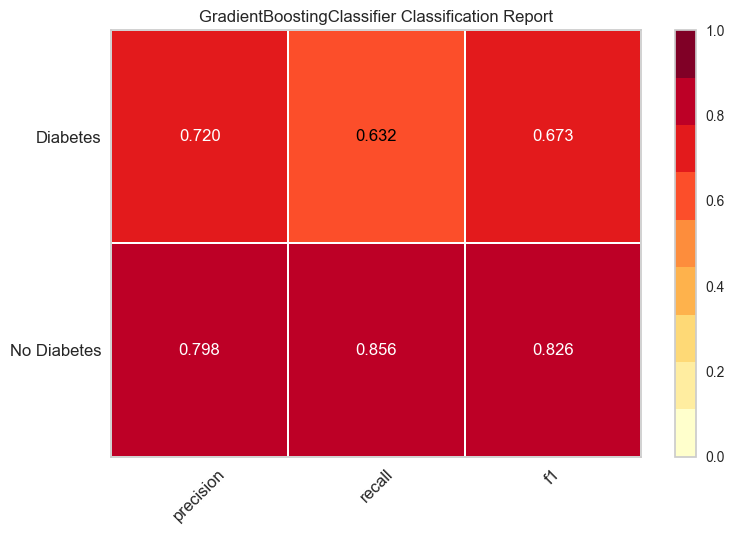

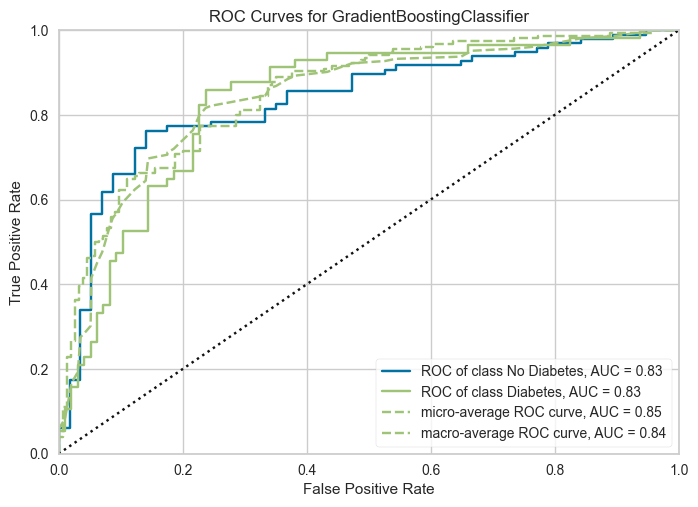

In [391]:
print(colored("confusion matrix for test data :\n",'red',attrs =['bold']), confusion_matrix(y_test,ypred_test10))
print(colored("confusion matrix for train data :\n",'red',attrs =['bold']), confusion_matrix(y_train,ypred_train10))
Performance_report(model =gbm,x_train= x_train,y_train=y_train,x_test=x_test,y_test=y_test,draw_roc = True)

In [392]:
# Append a row of decision tree output in the result dataframe
#columns = (Model Name, Class 0_precision, Class 1_precision, Class 0_recall, Class 1_recall)
result.loc[len(result.index)] = ['GBM Classifier',0.80,0.72,0.86,0.63,0.83]
result

Model Name  Precision_no_diabetes  Precision_diabetes  \
0        Logistic Regression                   0.78                0.75   
1   Decision Tree Classifier                   0.80                0.61   
2   Random Forest Classifier                   0.77                0.70   
3  Support Vector Classifier                   0.75                0.81   
4     Naive Bayes Classifier                   0.78                0.71   
5      KNeighbors Classifier                   0.74                0.68   
6         XGBoost Classifier                   0.80                0.68   
7        Catboost Classifier                   0.80                0.71   
8        LightGbm Classifier                   0.81                0.66   
9             GBM Classifier                   0.80                0.72   

   Recall_no_diabetes  Recall_diabetes   AUC  
0                0.89             0.58  0.85  
1                0.75             0.68  0.79  
2                0.86             0.58  0.83  
3                0.94             0.46  0.84  
4                0.86             0.60  0.83  
5                0.87             0.49  0.76  
6                0.81             0.67  0.82  
7                0.85             0.63  0.84  
8                0.79             0.68  0.80  
9                0.86             0.63  0.83

**Observations:**
* Using gbm classifier we got - 
    - Precision as 80% and recall as 86% for Non-diabetic class
    - Precision as 72% and recall as 63% for diabetic class 
* From AUCROC curve, we got AUC of 0.83
* When AUC is 0.83, it means there is a 83% chance that the model will be able to distinguish between positive class and negative class.
* GBM is also a good classifier for this problem, since it has precision and recall in moderate to high range and has AUC of 83%

In [393]:
# we can also define a function that will return classification report and auc score for each model
def model(x_train,y_train,model):
    
    clf = model()
    clf.fit(x_train,y_train)
    ypred = clf.predict(x_test)
    ypred_train = clf.predict(x_train)
    print(classification_report(y_test,ypred))
    print(colored("ROC_AUC_Score for test data :",'red',attrs = ['bold']),round(roc_auc_score(y_test,ypred),2))
    print(colored("ROC_AUC_Score for train data:",'red',attrs = ['bold']),round(roc_auc_score(y_train,ypred_train),2))

In [394]:
#Testing output of a function
model(x_train,y_train,SVC)

              precision    recall  f1-score   support

           0       0.75      0.94      0.83        97
           1       0.81      0.46      0.58        57

    accuracy                           0.76       154
   macro avg       0.78      0.70      0.71       154
weighted avg       0.77      0.76      0.74       154

ROC_AUC_Score for test data : 0.7
ROC_AUC_Score for train data: 0.69


**The fuction provides same output as that of individual models' output**

# Cross Validation : 

In [395]:
from sklearn.model_selection import cross_validate

In [396]:
cv_result = cross_validate(lr,x_train,y_train,cv = 10, scoring = 'roc_auc')
    
printmd("**CV score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g**" %(np.mean(cv_result['test_score']),
                                                                      np.std(cv_result['test_score']),
                                                                      np.min(cv_result['test_score']),
                                                                      np.max(cv_result['test_score'])))

<span style='color:None'>**CV score : Mean - 0.8282142 | Std - 0.07419955 | Min - 0.6916667 | Max - 0.9535424**</span>

In [397]:
# We can run a for loop for all the models
models = [lr,clf,rfc,knn,svc,xgb,lgbm,gbm,naive,catb]
model_name = ['Logistic Regression','Decision Tree Classifier','Random Forest Classifier','K-Nearest Neighbors',
             'Support Vector Classifier','XGboost','Light GBM','GBM', 'Naive Bayes', 'Catboost Classifier']
mean_test_score = []

for i,j in zip(models,model_name):
    printmd("**For "+str(j)+" model :""**",color ='brown')
    cv_result[j] = cross_validate(i,x_train,y_train,cv = 10, scoring = 'roc_auc')
    
    printmd("**CV score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g**" %(round(np.mean(cv_result[j]['test_score']),3),
                                                                      np.std(cv_result[j]['test_score']),
                                                                      np.min(cv_result[j]['test_score']),
                                                                      np.max(cv_result[j]['test_score'])))
    mean_test_score.append(np.mean(cv_result[j]['test_score']))
    
print(mean_test_score)
                                             

<span style='color:brown'>**For Logistic Regression model :**</span>

<span style='color:None'>**CV score : Mean - 0.828 | Std - 0.07419955 | Min - 0.6916667 | Max - 0.9535424**</span>

<span style='color:brown'>**For Decision Tree Classifier model :**</span>

<span style='color:None'>**CV score : Mean - 0.796 | Std - 0.1002423 | Min - 0.6312427 | Max - 0.9674797**</span>

<span style='color:brown'>**For Random Forest Classifier model :**</span>

<span style='color:None'>**CV score : Mean - 0.836 | Std - 0.07858588 | Min - 0.7095238 | Max - 0.9628339**</span>

<span style='color:brown'>**For K-Nearest Neighbors model :**</span>

<span style='color:None'>**CV score : Mean - 0.764 | Std - 0.07988273 | Min - 0.6238095 | Max - 0.8607955**</span>

<span style='color:brown'>**For Support Vector Classifier model :**</span>

<span style='color:None'>**CV score : Mean - 0.818 | Std - 0.08043116 | Min - 0.6559524 | Max - 0.9674797**</span>

<span style='color:brown'>**For XGboost model :**</span>

<span style='color:None'>**CV score : Mean - 0.812 | Std - 0.07500369 | Min - 0.6738095 | Max - 0.9291521**</span>

<span style='color:brown'>**For Light GBM model :**</span>

[LightGBM] [Info] Number of positive: 190, number of negative: 362
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000451 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 629
[LightGBM] [Info] Number of data points in the train set: 552, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.344203 -> initscore=-0.644620
[LightGBM] [Info] Start training from score -0.644620
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

<span style='color:None'>**CV score : Mean - 0.798 | Std - 0.07103663 | Min - 0.6869048 | Max - 0.9221835**</span>

<span style='color:brown'>**For GBM model :**</span>

<span style='color:None'>**CV score : Mean - 0.834 | Std - 0.08250227 | Min - 0.6595238 | Max - 0.9593496**</span>

<span style='color:brown'>**For Naive Bayes model :**</span>

<span style='color:None'>**CV score : Mean - 0.822 | Std - 0.07029557 | Min - 0.7131243 | Max - 0.9279907**</span>

<span style='color:brown'>**For Catboost Classifier model :**</span>

Learning rate set to 0.007994
0:	learn: 0.6885003	total: 6.25ms	remaining: 6.25s
1:	learn: 0.6846883	total: 12.6ms	remaining: 6.28s
2:	learn: 0.6810212	total: 15.3ms	remaining: 5.09s
3:	learn: 0.6769855	total: 19.2ms	remaining: 4.78s
4:	learn: 0.6723080	total: 26.6ms	remaining: 5.29s
5:	learn: 0.6689620	total: 29.7ms	remaining: 4.92s
6:	learn: 0.6648414	total: 34ms	remaining: 4.82s
7:	learn: 0.6611901	total: 41.1ms	remaining: 5.09s
8:	learn: 0.6570430	total: 44ms	remaining: 4.84s
9:	learn: 0.6533753	total: 46.5ms	remaining: 4.6s
10:	learn: 0.6494465	total: 51ms	remaining: 4.58s
11:	learn: 0.6457458	total: 59.4ms	remaining: 4.89s
12:	learn: 0.6418326	total: 62.5ms	remaining: 4.74s
13:	learn: 0.6384236	total: 66.4ms	remaining: 4.68s
14:	learn: 0.6348827	total: 72.7ms	remaining: 4.77s
15:	learn: 0.6311611	total: 75.6ms	remaining: 4.65s
16:	learn: 0.6270672	total: 79.8ms	remaining: 4.61s
17:	learn: 0.6242546	total: 88.3ms	remaining: 4.82s
18:	learn: 0.6207295	total: 91.6ms	remaining: 4.73s

<span style='color:None'>**CV score : Mean - 0.836 | Std - 0.07833222 | Min - 0.7095238 | Max - 0.9593496**</span>

[0.8282141537324466, 0.7955316228486959, 0.8357825203252032, 0.7637915082884594, 0.8180336025762855, 0.8119167722521381, 0.7978026343575124, 0.834035740682082, 0.822453278428888, 0.8356708636891564]


In [398]:
result['Mean_Test_Score'] = mean_test_score

<Axes: xlabel='Outcome', ylabel='count'>

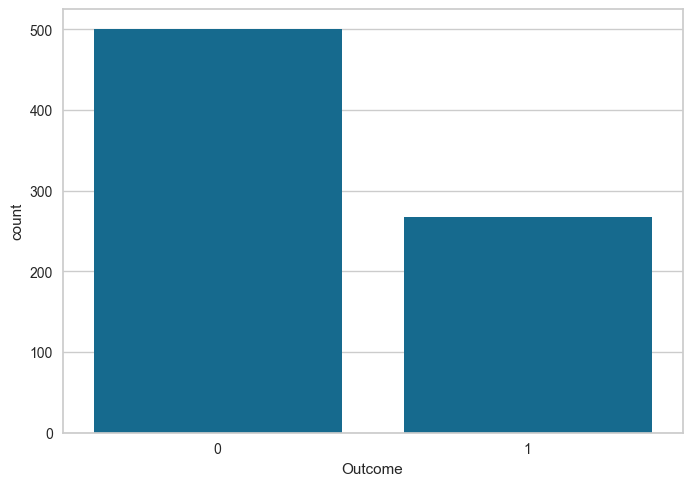

In [399]:
import seaborn as sns

sns.countplot(x='Outcome', data=df_copy)


In [400]:
result.sort_values(by = ['AUC'],ascending =False)

Model Name  Precision_no_diabetes  Precision_diabetes  \
0        Logistic Regression                   0.78                0.75   
3  Support Vector Classifier                   0.75                0.81   
7        Catboost Classifier                   0.80                0.71   
2   Random Forest Classifier                   0.77                0.70   
4     Naive Bayes Classifier                   0.78                0.71   
9             GBM Classifier                   0.80                0.72   
6         XGBoost Classifier                   0.80                0.68   
8        LightGbm Classifier                   0.81                0.66   
1   Decision Tree Classifier                   0.80                0.61   
5      KNeighbors Classifier                   0.74                0.68   

   Recall_no_diabetes  Recall_diabetes   AUC  Mean_Test_Score  
0                0.89             0.58  0.85         0.828214  
3                0.94             0.46  0.84         0.763792  
7                0.85             0.63  0.84         0.834036  
2                0.86             0.58  0.83         0.835783  
4                0.86             0.60  0.83         0.818034  
9                0.86             0.63  0.83         0.835671  
6                0.81             0.67  0.82         0.797803  
8                0.79             0.68  0.80         0.822453  
1                0.75             0.68  0.79         0.795532  
5                0.87             0.49  0.76         0.811917

<h3 style='color:red'>Observations: </h3>

**Model Comparison:**

* From above graph we can see that the dataset is imbalanced.
* In case of such dataset, AUC score is a better measure of determining model's accuracy.
* From the 'result' dataframe, we can conclude that logistic regression is a best model in classification of diabetic and non-diabetic patients with an AUC of 85%.
* With KNN, the model precisely classifies non-diabetic patients but has poor performance in identifying diabetic patients.
* Considering, mean test score and AUC, knn has least AUC(76%) amongst all the model. 
* For the availabe dataset, knn will not be a good algorithm, the reason being, it doesn't make any assumptions for model building.
* Considering Mean Test Score, Gradient boosting machine algorithm has highest score of 83.66%. It also has a good AUC score, Apart form Loistic regression, GBM seems to be a promising algorithm as well
* For Catboost Classifier also, the mean trst score is quite good(83.44%), AUC is 84% and there is acceptable range of precison and recall.

# Data Reporting -

A  dashboard is created in tableau by choosing appropriate chart types and metrics useful for the business. The dashboard entail the following:

a. Pie chart to describe the diabetic or non-diabetic population

b. Scatter charts between relevant variables to analyze the relationships

c. Histogram or frequency charts to analyze the distribution of the data

d. Heatmap of correlation analysis among the relevant variables

e. Create bins of these age values: 20-25, 25-30, 30-35, etc. Analyze different variables for these age brackets using a bubble chart.

# The End..!